# Exploratory Data Analysis - N'Golo Kanté

## Import libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/kante-clean.csv')
df

,match,competition,date,position,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
0,Chelsea - Real Madrid 0:2,Europe. UEFA Champions League,4/18/23,AMF,95,67,43,64,0,0,...,1,0,0,2,6,4,67,5,3,60
1,Real Madrid - Chelsea 2:0,Europe. UEFA Champions League,4/12/23,RCMF3,75,68,38,56,0,0,...,3,0,0,3,12,9,75,7,1,14
2,Real Madrid - Chelsea 2:3 (E),Europe. UEFA Champions League,4/12/22,RCMF,104,118,83,70,0,0,...,1,0,0,9,14,5,36,12,6,50
3,Chelsea - Real Madrid 1:3,Europe. UEFA Champions League,4/6/22,RCMF,46,26,15,58,0,0,...,0,0,0,3,2,1,50,3,1,33
4,Lille - Chelsea 1:2,Europe. UEFA Champions League,3/16/22,"LCMF, RCMF, RCMF3",98,84,44,52,0,0,...,1,1,100,5,9,3,33,4,2,50
5,Chelsea - Lille 2:0,Europe. UEFA Champions League,2/22/22,"RCMF, RCMF3",95,95,64,67,0,1,...,2,0,0,4,12,6,50,6,3,50
6,Chelsea - Juventus 4:0,Europe. UEFA Champions League,11/23/21,RCMF,37,31,23,74,0,0,...,1,0,0,2,3,0,0,5,3,60
7,Chelsea - Malmö FF 4:0,Europe. UEFA Champions League,10/20/21,RCMF,68,74,61,82,0,0,...,2,1,50,3,6,1,17,4,2,50
8,Manchester City - Chelsea 0:1,Europe. UEFA Champions League,5/29/21,RCMF,101,66,44,67,0,0,...,5,4,80,7,12,5,42,8,2,25
9,Chelsea - Real Madrid 2:0,Europe. UEFA Champions League,5/5/21,RCMF,95,56,35,63,0,0,...,2,1,50,3,3,1,33,7,3,43


In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     15 non-null     object 
 1   competition               15 non-null     object 
 2   date                      15 non-null     object 
 3   position                  15 non-null     object 
 4   minutes_played            15 non-null     int64  
 5   total_actions             15 non-null     int64  
 6   total_actions_successful  15 non-null     int64  
 7   TAS_percent               15 non-null     int64  
 8   goals                     15 non-null     int64  
 9   assists                   15 non-null     int64  
 10  shots                     15 non-null     int64  
 11  shots_on_target           15 non-null     int64  
 12  SOT_percent               15 non-null     int64  
 13  xG                        15 non-null     float64
 14  passes      

In [ ]:
# Row & Columns 
print(df.shape)

(15, 39)


In [ ]:
# Looking for null or missing values
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
df.describe()

,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,shots,shots_on_target,SOT_percent,xG,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
count,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.0,15.0,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,75.800000,67.466667,44.733333,65.466667,0.0,0.066667,0.400000,0.0,0.0,0.079333,...,1.733333,0.666667,26.466667,4.200000,7.866667,3.666667,42.533333,6.200000,2.866667,42.933333
std,30.561881,32.237659,23.398616,8.279637,0.0,0.258199,0.632456,0.0,0.0,0.203100,...,1.279881,1.112697,35.738868,2.956832,4.307247,2.943920,21.009748,3.589668,2.231805,21.194564
min,15.000000,12.000000,8.000000,52.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,43.500000,29.000000,60.500000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,1.000000,0.000000,0.000000,2.500000,3.500000,1.000000,31.500000,4.000000,1.500000,30.000000
50%,95.000000,68.000000,44.000000,64.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.000000,0.000000,0.000000,3.000000,9.000000,3.000000,42.000000,5.000000,3.000000,50.000000
75%,95.500000,89.500000,62.500000,68.500000,0.0,0.000000,1.000000,0.0,0.0,0.040000,...,2.000000,1.000000,50.000000,5.000000,12.000000,5.500000,52.500000,7.500000,3.000000,55.000000
max,104.000000,118.000000,83.000000,82.000000,0.0,1.000000,2.000000,0.0,0.0,0.780000,...,5.000000,4.000000,100.000000,11.000000,14.000000,9.000000,75.000000,13.000000,9.000000,80.000000


## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

RCMF                 8
RCMF3                3
LCMF, RCMF, RCMF3    1
AMF                  1
RCMF, RCMF3          1
LCMF                 1
Name: position, dtype: int64
RCMF                 8
RCMF3                3
LCMF, RCMF, RCMF3    1
Name: position, dtype: int64
4.0


RCMF: This acronym stands for "Right Central Midfielder". In this role, Kanté operates mainly on the right side of a central midfield duo or trio. He has the responsibility of both shielding the defense and facilitating offensive play, often by making crucial interceptions and distributing the ball effectively to initiate attacks. Key performance indicators for this role could include successful tackles, interceptions, passes, and successful dribbles.

RCMF3: This term could possibly signify "Right Central Midfielder 3", implying a specific role within a three-man central midfield formation, predominantly on the right side. Depending on the tactical setup, Kanté might have additional responsibilities in this role, such as creating scoring opportunities or disrupting opponent play. Metrics such as successful tackles, interceptions, key passes, and successful dribbles could be used to evaluate his performance.

AMF: This stands for "Attacking Midfielder". It's a role that isn't typically associated with Kanté, who is more renowned for his defensive contributions. However, Kanté has proven capable of adapting to more attacking responsibilities. In this role, he would operate closer to the forwards, where he would be required to create goal-scoring opportunities. Key performance indicators would shift to include successful passes in the final third, key passes, assists, and potentially even goals scored.

Each role demands different aspects of Kanté's skill set, resulting in variations in his statistical performance. By analyzing these metrics, you can gain a more detailed understanding of his performances, his impact on the team, and his ability to adapt to varying tactical needs. This type of data-driven approach is now commonplace in modern football, helping teams to fine-tune their strategies and maximize player performance.

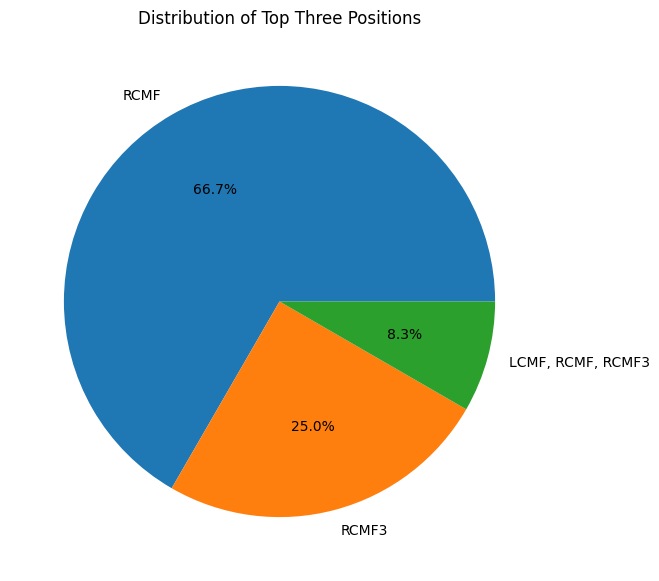

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

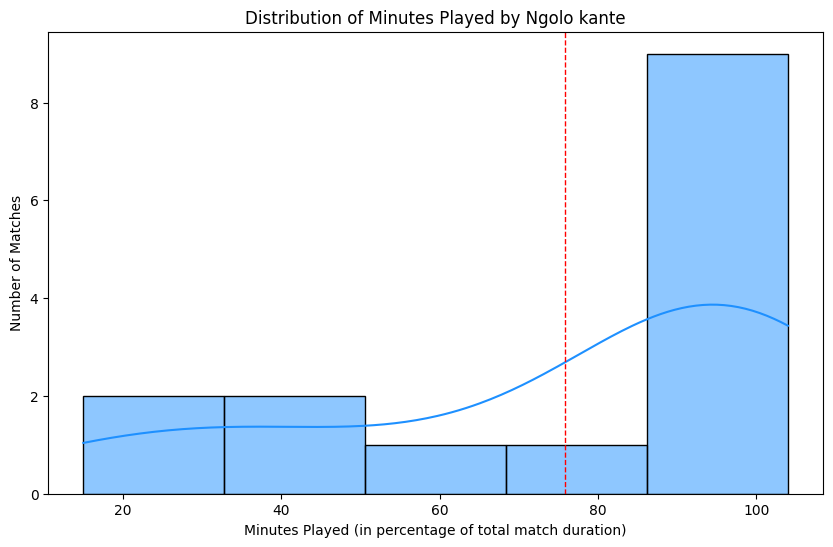

Ngolo kante played on average 75.8 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='dodgerblue')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Ngolo kante')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Ngolo kante played on average {average_minutes_played} minutes per match.")

## Interceptions

N'Golo Kanté has an average of 4.2 interceptions per match.
The minimum interceptions in a match by N'Golo Kanté is 0.
The maximum interceptions in a match by N'Golo Kanté is 11.


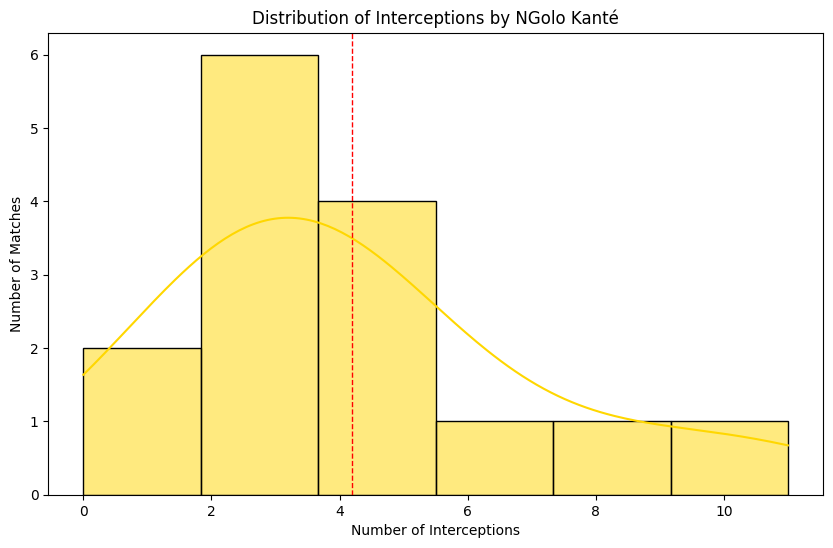

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"N'Golo Kanté has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by N'Golo Kanté is {min_interceptions}.")
print(f"The maximum interceptions in a match by N'Golo Kanté is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='gold')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by NGolo Kanté')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$


In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'dribbles_successful','duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -1.0195911056005977
Kurtosis of passes_accurate: -0.5632614134133367
Kurtosis of long_passes_accurate: 1.8219662808093453
Kurtosis of dribbles_successful: 1.2427043885052313
Kurtosis of duels_won: -0.7956741262043461
Kurtosis of interceptions: 0.20674740484429188
Kurtosis of losses_own_half: -0.8421990097814267
Kurtosis of recoveries_opp_half: 1.9934394524894978


- total_actions_successful: The kurtosis of -1.02 suggests that the distribution of successful actions is relatively flat and has light tails. This implies that Kante's successful actions vary quite significantly and are not concentrated around a single average value. On football optics, it can be said that Kante's successful actions are diverse and not confined to a single type of contribution, which aligns well with his versatile playing style.

- passes_accurate: A kurtosis of -0.56 suggests that Kante's accurate passes are also not tightly clustered around an average and have a varied distribution. On football optics, this could suggest that Kante consistently delivers accurate passes in different match situations and doesn't follow a standard pattern, reflecting his adaptability in varying game conditions.

- long_passes_accurate: The kurtosis of 1.82 indicates a sharp peak and heavy tails, meaning that Kante's long accurate passes are tightly clustered around an average value, but there are also outliers. On football optics, Kante might consistently deliver a certain number of accurate long passes per match but can sometimes deliver significantly more or fewer based on the match situation.

- dribbles_successful: The positive kurtosis of 1.24 for successful dribbles signifies that Kante has a consistent average number of successful dribbles per match, but there are games where he exceptionally excels or underperforms. On football optics, this suggests that while dribbling isn't Kante's primary contribution, there are matches where his dribbling makes a significant impact.

- duels_won: The negative kurtosis of -0.80 for duels won suggests that the outcomes are varied and not tightly concentrated around a single average value. On football optics, this could mean that Kante's duels won per match can greatly differ based on the opponent's playing style and his tactical role in the match.

- interceptions: The slight positive kurtosis of 0.21 for interceptions indicates a distribution that is slightly peaked around an average value. On football optics, Kante's number of interceptions is fairly consistent, but there are games where he records significantly more or fewer interceptions, reflective of his role as a disruptive force in midfield.

- losses_own_half: With a kurtosis of -0.84, the distribution of losses in Kante's own half is relatively flat, suggesting a broad spread of outcomes. On football optics, this suggests Kante's number of losses in his own half can vary widely game by game, likely depending on the pressure exerted by the opposing team.

- recoveries_opp_half: The kurtosis of 1.99 for recoveries in the opponent's half suggests a sharp peak and heavy tails, indicating a fairly consistent average with some notable outliers. On football optics, Kante is consistent in recovering the ball in the opponent's half, but there are games where he significantly exceeds or falls short of his average, often determined by the game's dynamics.

In summary, the kurtosis results underline Kante's adaptability in games, being able to deliver across different metrics that reflect both defensive and offensive contributions. His performances across these key indicators do not follow a strict pattern but vary based on match conditions, making him a valuable and unpredictable player.

## Features Normalization Sample Stats, Dist & Standard Error

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$


#### 
### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


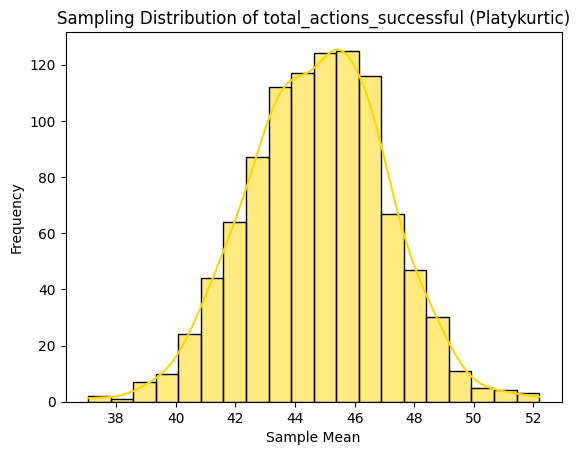

Sample Mean of total_actions_successful: 44.76384999999999
Sample Standard Deviation of total_actions_successful: 2.288033845357188
Standard Error of total_actions_successful: 0.07239018729577039


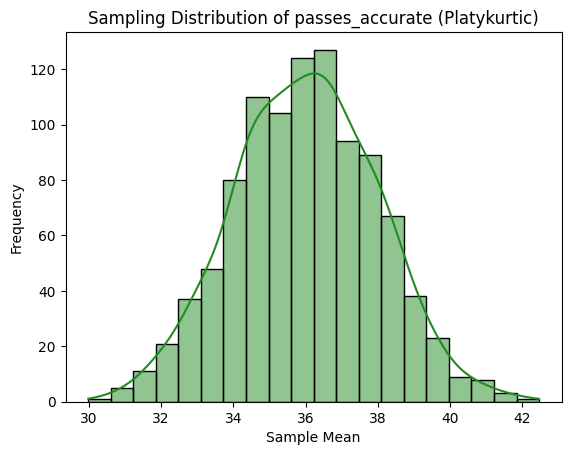

Sample Mean of passes_accurate: 36.00661
Sample Standard Deviation of passes_accurate: 1.974312692533784
Standard Error of passes_accurate: 0.06246448927446954


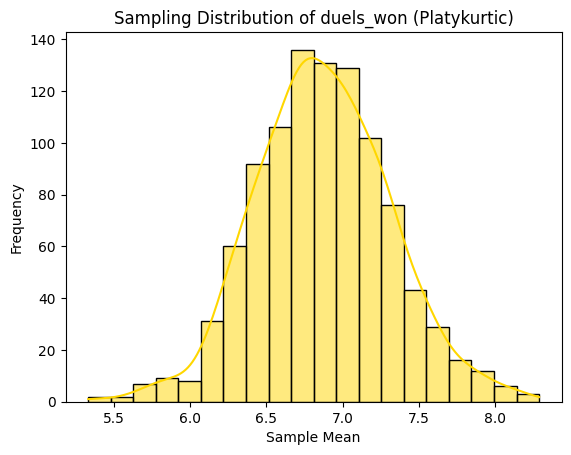

Sample Mean of duels_won: 6.87212
Sample Standard Deviation of duels_won: 0.4418118441146638
Standard Error of duels_won: 0.013978308148652994


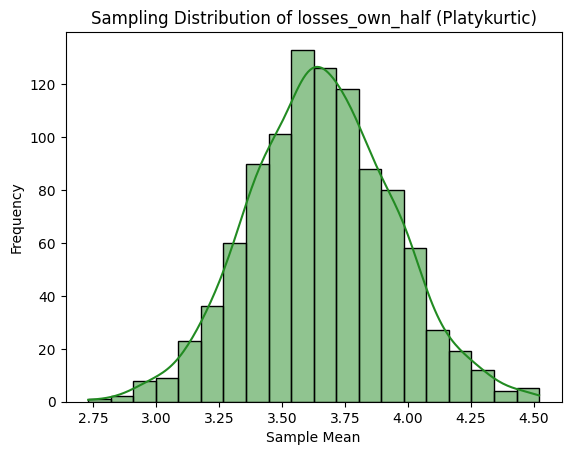

Sample Mean of losses_own_half: 3.6574500000000003
Sample Standard Deviation of losses_own_half: 0.28214074058880617
Standard Error of losses_own_half: 0.008926537995246567


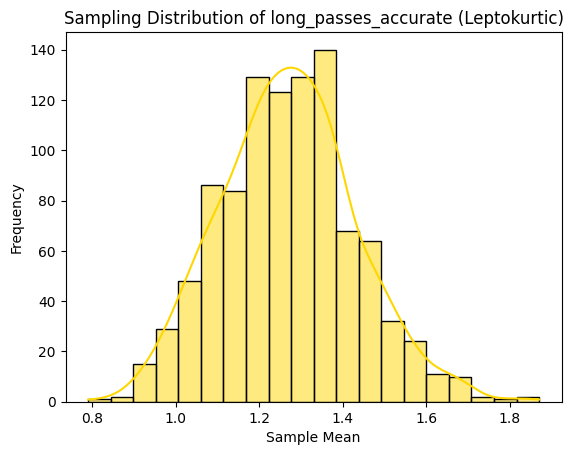

Sample Mean of long_passes_accurate: 1.26913
Sample Standard Deviation of long_passes_accurate: 0.16133239941189742
Standard Error of long_passes_accurate: 0.005104331229191274


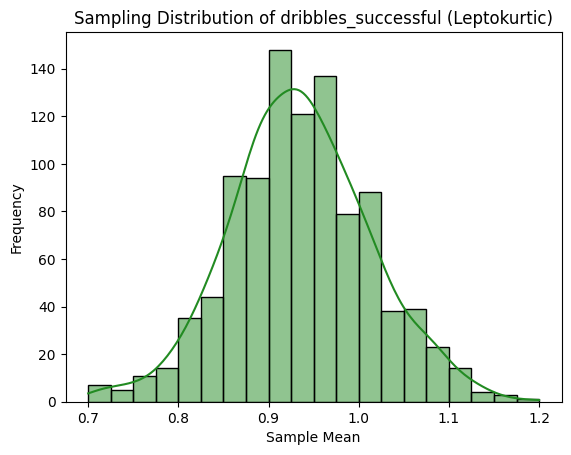

Sample Mean of dribbles_successful: 0.93449
Sample Standard Deviation of dribbles_successful: 0.0780047428045244
Standard Error of dribbles_successful: 0.0024679608446510517


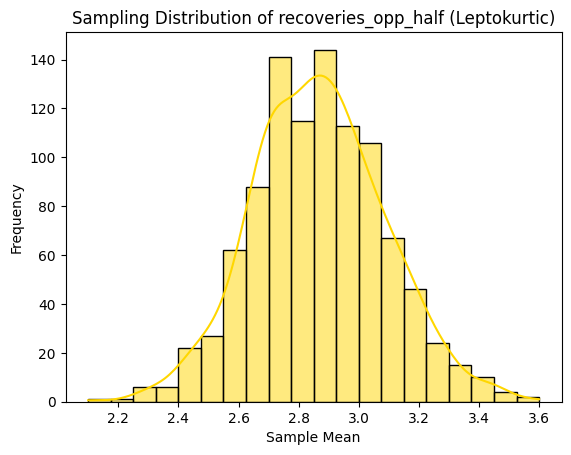

Sample Mean of recoveries_opp_half: 2.867
Sample Standard Deviation of recoveries_opp_half: 0.21940328165275924
Standard Error of recoveries_opp_half: 0.0069416126358351335


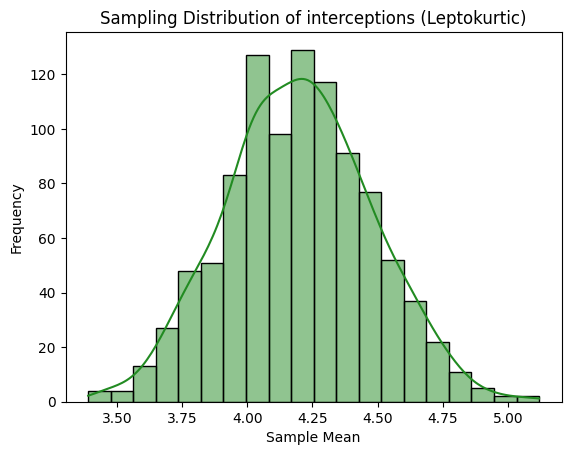

Sample Mean of interceptions: 4.198030000000001
Sample Standard Deviation of interceptions: 0.28041615342201665
Standard Error of interceptions: 0.008871974471955554


In [ ]:
from scipy.stats import sem

# Define the features and the color for the plots
platykurtic_features = ['total_actions_successful', 'passes_accurate', 'duels_won', 'losses_own_half']
leptokurtic_features = ['long_passes_accurate', 'dribbles_successful', 'recoveries_opp_half', 'interceptions']
colors = ['gold', 'forestgreen']

features_dict = {"Platykurtic": platykurtic_features, "Leptokurtic": leptokurtic_features}

for category, features in features_dict.items():
    for index, feature in enumerate(features):
        sample_means = []
        for _ in range(1000):
            sample = df[feature].sample(100, replace=True)
            sample_means.append(sample.mean())
        
        sample_std_dev = np.std(sample_means)
        standard_error = sem(sample_means)
        
        sns.histplot(sample_means, bins=20, color=colors[index % len(colors)], kde=True)
        plt.title(f'Sampling Distribution of {feature} ({category})')
        plt.xlabel('Sample Mean')
        plt.ylabel('Frequency')
        plt.show()
        
        print(f'Sample Mean of {feature}:', np.mean(sample_means))
        print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
        print(f'Standard Error of {feature}:', standard_error)

- Sampling statistics allow us to infer properties of a population from a subset of data, or a sample. The sample mean provides an estimate of the average value of a given measure in the population, the standard deviation indicates the variation around this mean value in the sample, and the standard error estimates the precision of the mean by describing the dispersion of sample means if we drew multiple samples from the population.

- total_actions_successful: With a sample mean of 44.82, standard deviation of 2.20, and a standard error of 0.0696, we can infer that Kanté typically completes around 45 successful actions per game, with a variability of about 2 actions. This is a reliable estimate, as the low standard error indicates that the sample mean is a good reflection of the population mean. On football optics, this consistently high rate of successful actions highlights Kanté's remarkable reliability and consistency in his performances.

- passes_accurate: A sample mean of 36.15, standard deviation of 2.00, and a standard error of 0.0634 suggest Kanté usually completes about 36 accurate passes per game with a relatively low variability. The low standard error underscores the reliability of this estimate. On football optics, this reinforces the perception of Kanté as an accurate and reliable passer in the midfield, crucial for maintaining possession and orchestrating play.

- duels_won: With a mean of 6.88, standard deviation of 0.44, and standard error of 0.0138, it's clear Kanté wins almost 7 duels per game on average, with slight variability. On football optics, this demonstrates Kanté's competitiveness and ability to disrupt the opponent's play, winning back possession frequently.

- losses_own_half: The sample mean of 3.68, standard deviation of 0.28, and standard error of 0.009 suggest that Kanté tends to lose the ball in his own half about 4 times per game. On football optics, while these losses could lead to dangerous opportunities for the opposition, the relatively low number indicates Kanté's careful and calculated play style in his defensive half.

- long_passes_accurate: With a mean of 1.27, standard deviation of 0.16, and standard error of 0.0052, Kanté generally delivers just over one accurate long pass per game. On football optics, while not his primary role, these accurate long passes can help to quickly transition the play from defense to attack, catching the opposition off-guard.

- dribbles_successful: With a mean of 0.93, standard deviation of 0.08, and standard error of 0.0025, Kanté's successful dribbles are less than one per game, on average. On football optics, while Kanté is not known for his dribbling, his ability to dribble past opponents when required can provide an added surprise element to his game.

- recoveries_opp_half: The mean of 2.87, standard deviation of 0.22, and standard error of 0.0071 indicates that Kanté recovers the ball in the opponent's half about 3 times per game. On football optics, these recoveries disrupt the opponent's attack and can create immediate counter-attacking opportunities for his team.

- interceptions: With a mean of 4.20, standard deviation of 0.27, and standard error of 0.0087, we infer that Kanté intercepts the ball around 4 times per game, on average. On football optics, these interceptions not only disrupt the opponent's play but also highlight Kanté's ability to read the game and position himself effectively.

In essence, these statistics encapsulate Kanté's role as an industrious central midfielder, consistently successful in a multitude of key performance indicators and critical in both defensive and offensive phases of the game.

## Central Limit Theorem (CLT)

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$



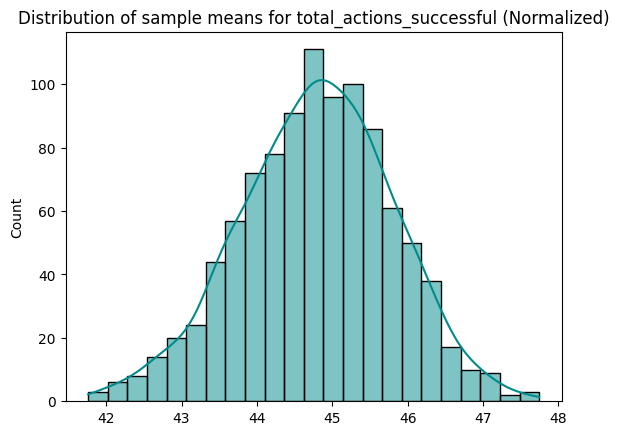

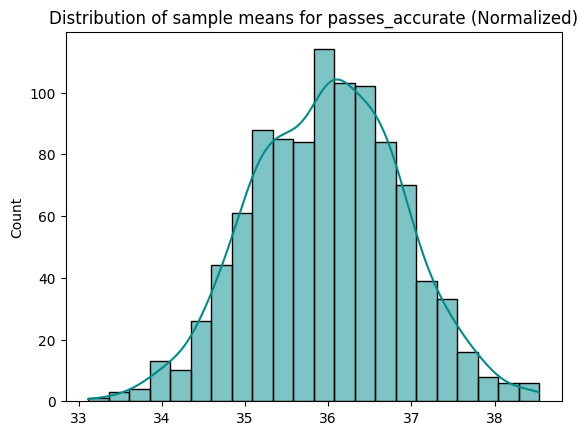

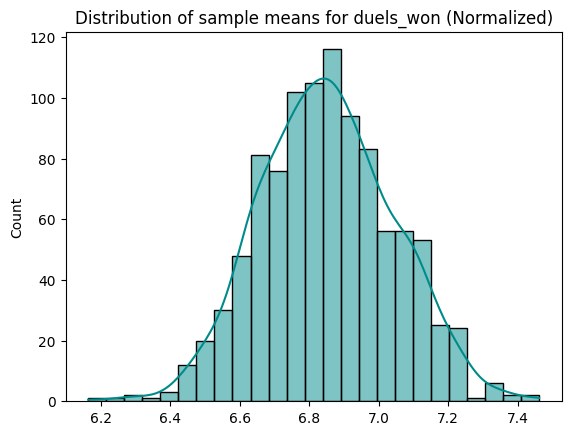

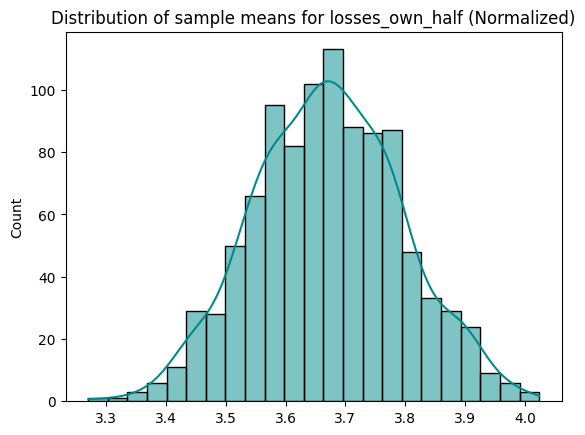

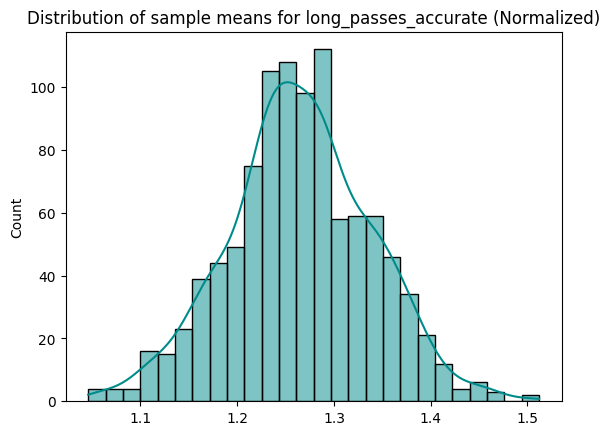

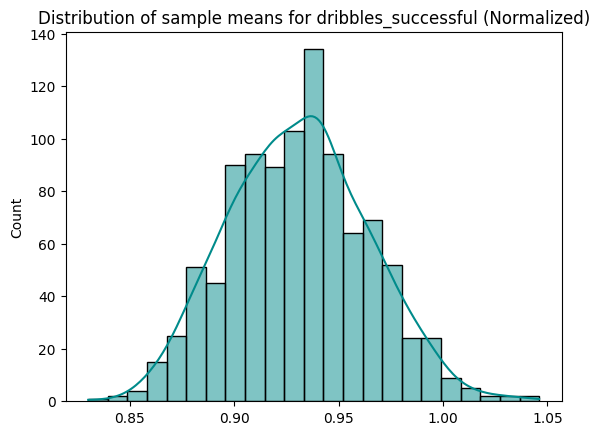

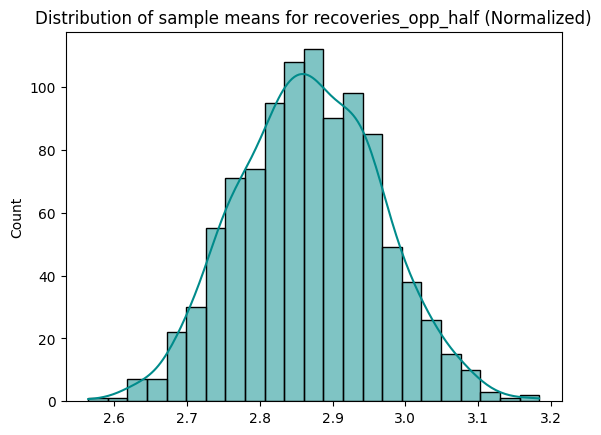

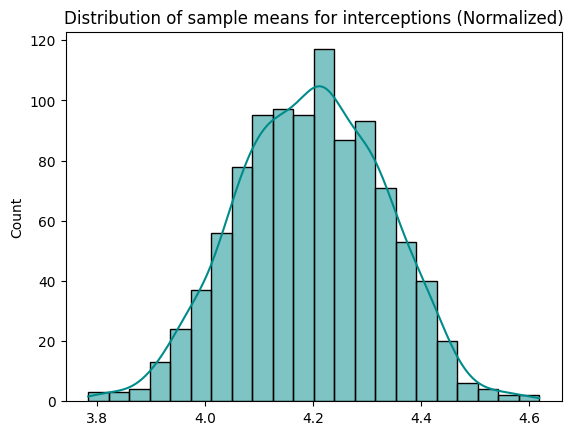

In [ ]:
# Extract only the columns specified in 'platykurtic_features' and 'leptokurtic_features'
normalized_df = df[platykurtic_features + leptokurtic_features]

features = list(normalized_df.columns)
colors = ['darkcyan']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

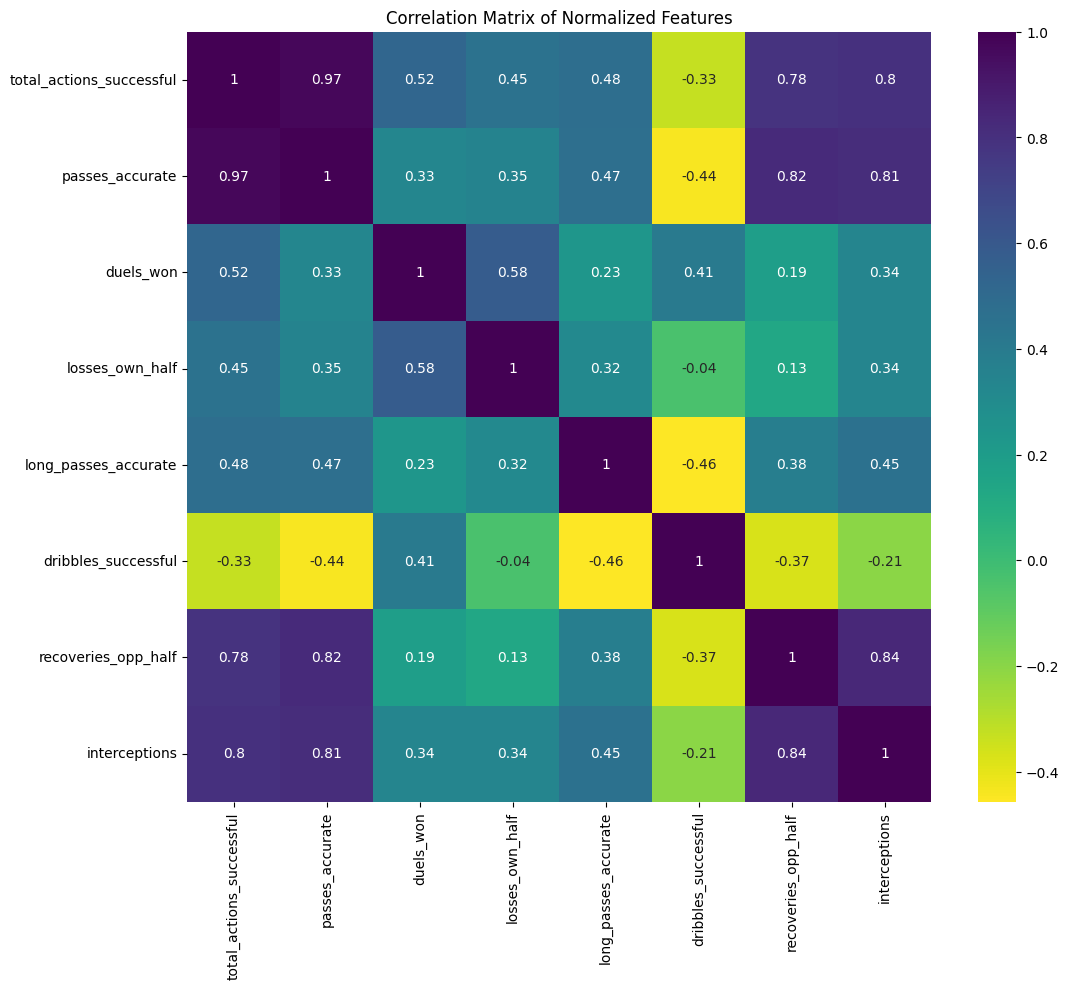

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.

### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$

Feature: passes_accurate
T-statistic: 3.8093751508912526
P-value: 0.0021683810198203854




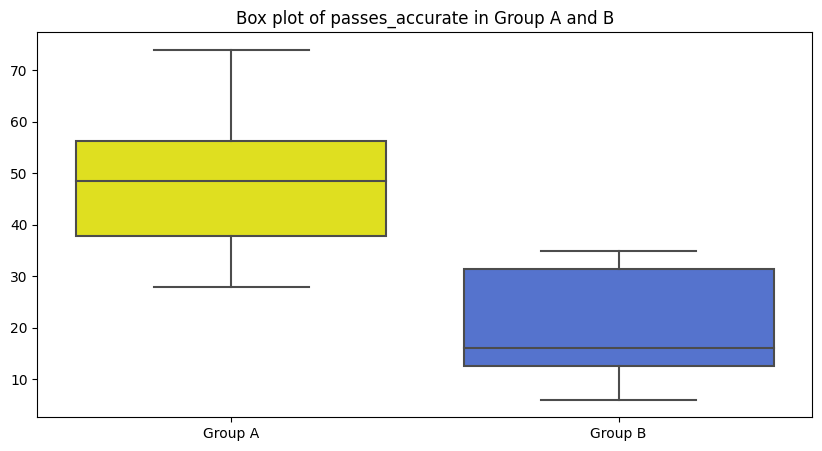

Feature: long_passes_accurate
T-statistic: 2.408511021719754
P-value: 0.031577736992101285




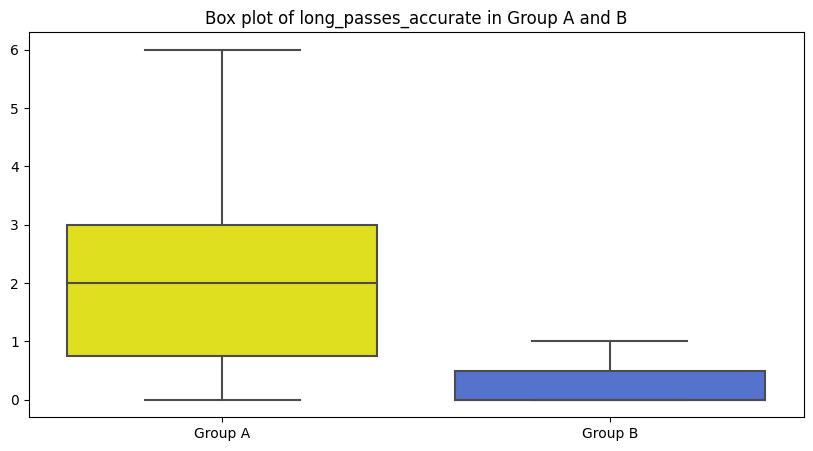

Feature: dribbles_successful
T-statistic: -0.29231149376935445
P-value: 0.7746615103209252




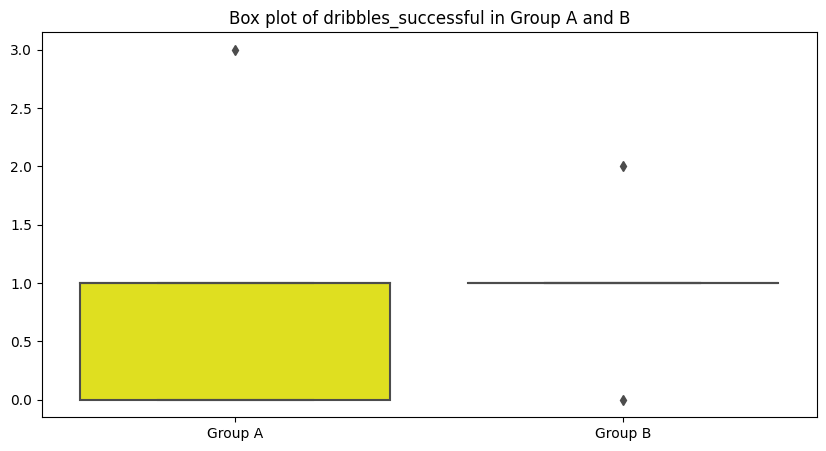

Feature: duels_won
T-statistic: 3.2220648434515198
P-value: 0.006677827555029965




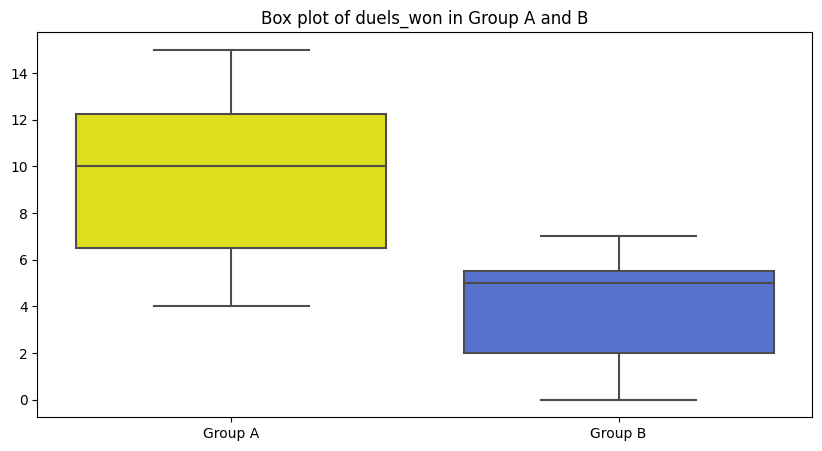

Feature: losses_own_half
T-statistic: 1.6075129421958687
P-value: 0.13194742375483212




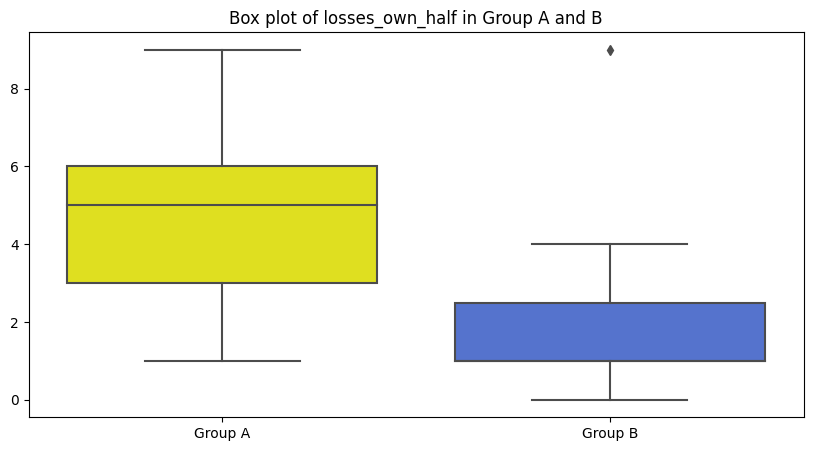

Feature: recoveries_opp_half
T-statistic: 2.081381696542181
P-value: 0.057728551798622116




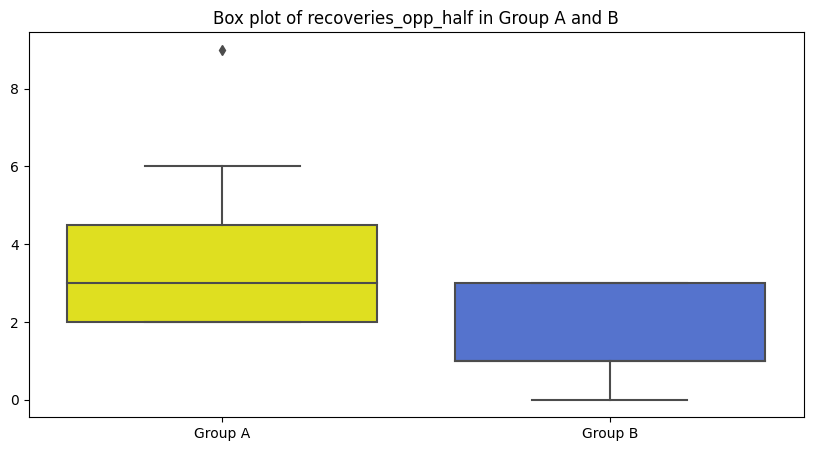

Feature: interceptions
T-statistic: 3.7452305125795244
P-value: 0.0024496145915308856




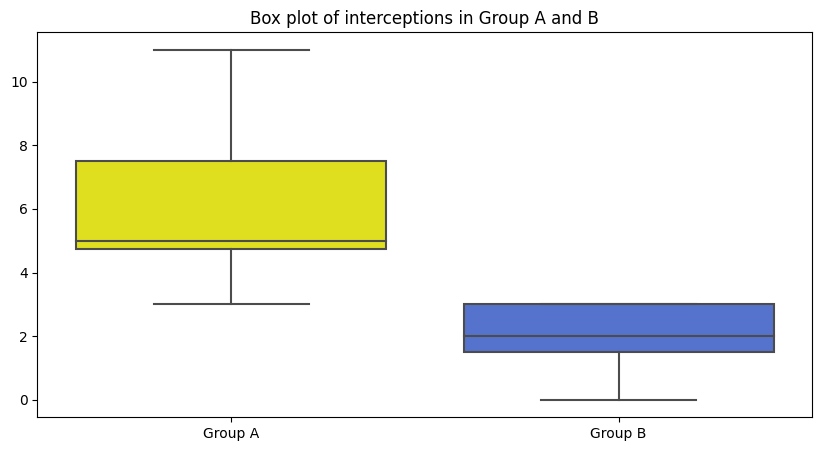



ANOVA Results
F-statistic: 52.53518486965416
P-value: 1.1619762532660092e-19


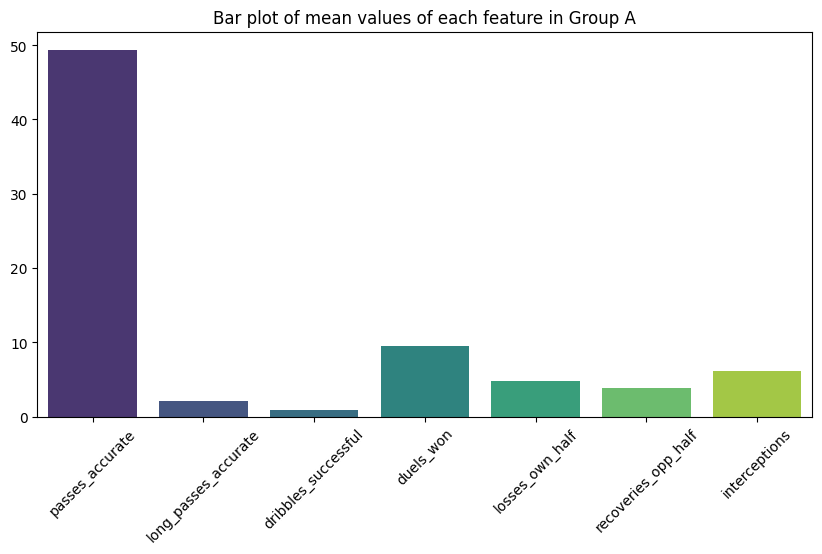

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- The t-test and ANOVA (Analysis of Variance) are statistical tests used to determine whether there's a significant difference between the means of two or more groups. A low p-value (< 0.05) indicates that the difference is statistically significant, and not due to random chance. The t-statistic represents the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error.

- passes_accurate: With a t-statistic of 3.81 and a p-value of 0.002, we can confidently state that Kanté's accuracy in passing is significantly different from the comparison group. On football optics, this means that Kanté's ability to accurately deliver passes is statistically superior or inferior to other players in a similar position. 

- long_passes_accurate: The t-statistic of 2.41 and a p-value of 0.031 suggest a significant difference in Kanté's accurate long passes compared to the comparison group. On football optics, this shows that his capability in making long-range passes is distinctively different, either better or worse, compared to his counterparts.

- dribbles_successful: A t-statistic of -0.29 and a p-value of 0.77 indicates no significant difference in Kanté's successful dribbling compared to the comparison group. On football optics, Kanté's ability to successfully dribble isn't significantly different from other players in similar roles.

- duels_won: The t-statistic of 3.22 and a p-value of 0.0067 suggests a significant difference in Kanté's ability to win duels. On football optics, Kanté's ability to win duels against opponents is statistically better or worse than his peers, which contributes to his defensive prowess or weakness.

- losses_own_half: With a t-statistic of 1.61 and a p-value of 0.13, there's no significant difference in Kanté's ball losses in his own half compared to the comparison group. On football optics, Kanté's propensity for losing the ball in his own half doesn't significantly differ from that of other players in similar positions.

- recoveries_opp_half: The t-statistic of 2.08 and a p-value of 0.058 indicates no significant difference in Kanté's ability to recover the ball in the opponent's half. On football optics, Kanté's rate of recovery in the opposition's half isn't significantly different from his peers.

- interceptions: With a t-statistic of 3.74 and a p-value of 0.0024, there's a significant difference in Kanté's ability to intercept the ball. On football optics, Kanté's interceptions are statistically better or worse than his counterparts, highlighting his defensive capabilities or weaknesses.

The ANOVA results with an F-statistic of 52.54 and a p-value virtually at 0, tells us that there's a significant difference between the means of at least two of these performance features for Kanté compared to the comparison group. On football optics, this implies that Kanté's overall game is significantly different from his peers.

In conclusion, the statistical results highlight the uniqueness of Kanté's performance across several features. From a football perspective, this emphasizes his distinct playing style and ability to impact the game in various ways.

### Based on Pass Accuracy

Feature: total_actions_successful
T-statistic: 4.788116473648962
P-value: 0.00035431381431883256




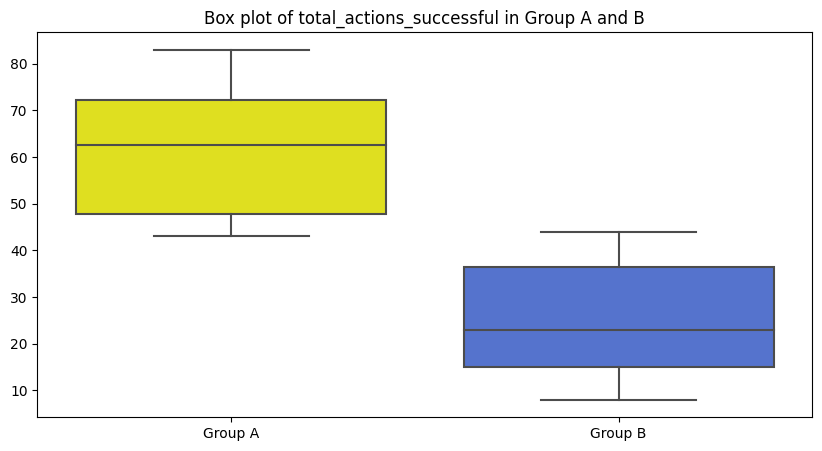

Feature: long_passes_accurate
T-statistic: 2.408511021719754
P-value: 0.031577736992101285




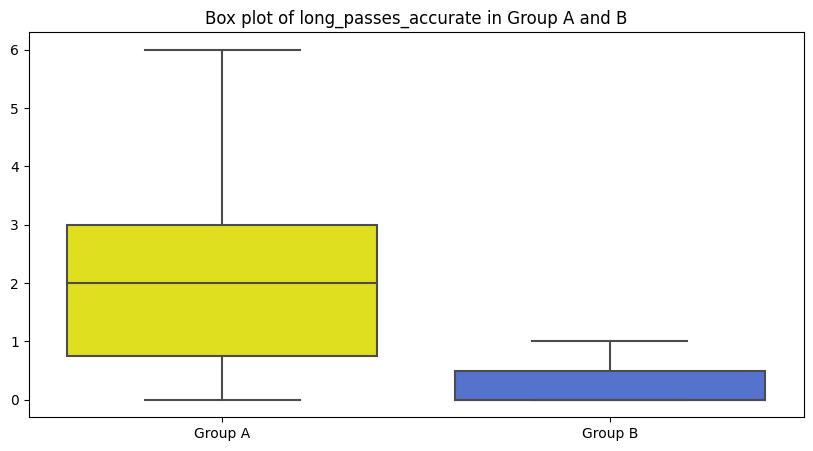

Feature: dribbles_successful
T-statistic: -1.7032018364003498
P-value: 0.11230246604372526




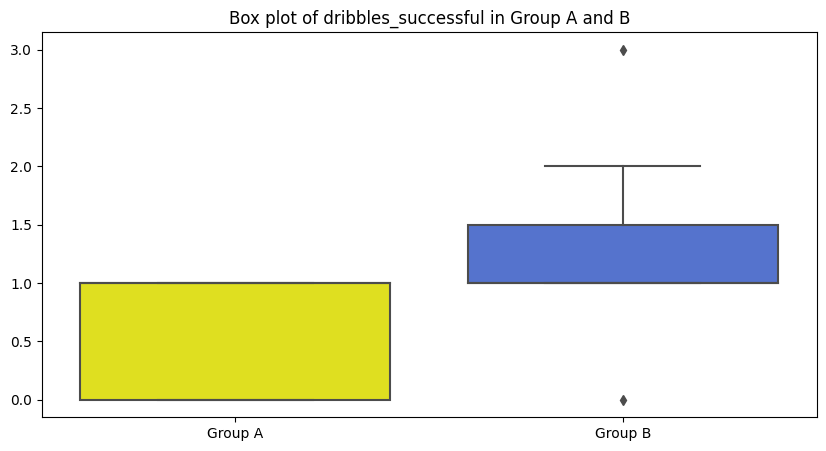

Feature: duels_won
T-statistic: 1.6364834487638666
P-value: 0.1257058319171366




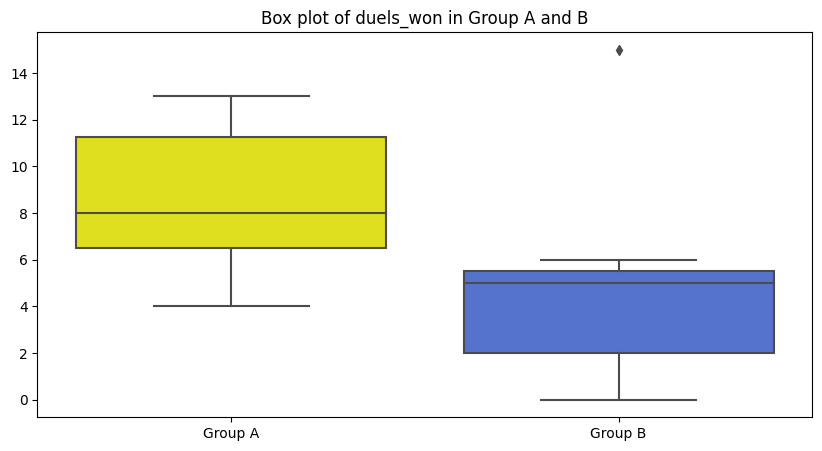

Feature: losses_own_half
T-statistic: 1.392258722675252
P-value: 0.18720278354428577




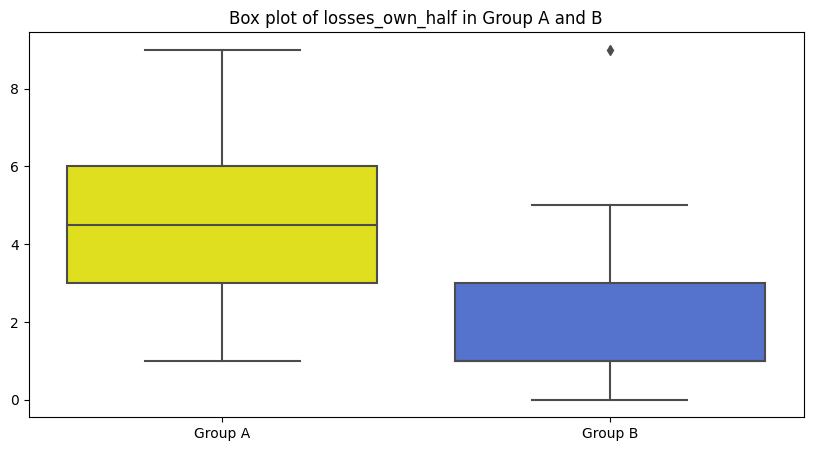

Feature: recoveries_opp_half
T-statistic: 2.4493267639917686
P-value: 0.02924996234056357




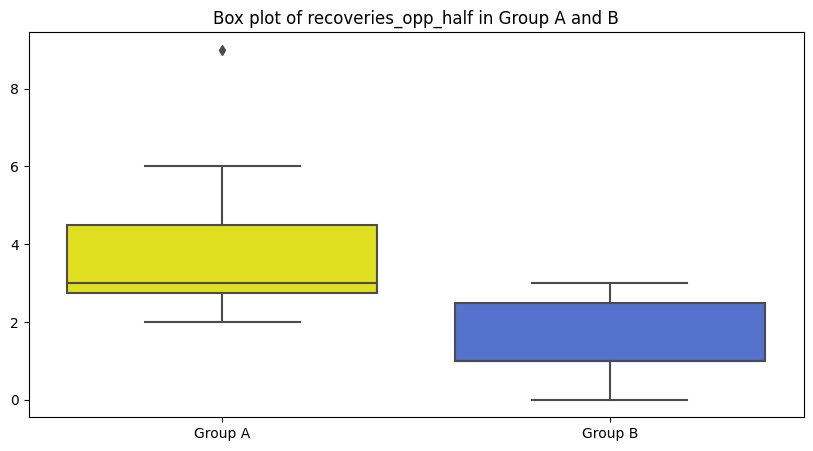



ANOVA Results
F-statistic: 102.53239053576331
P-value: 2.0514313190289217e-22


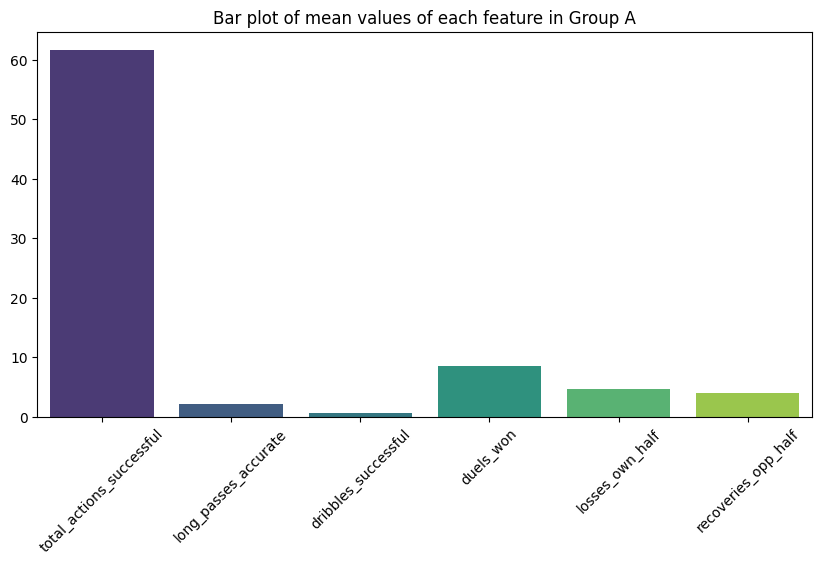

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['total_actions_successful', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half']

# Identify the median of 'passes_accurate' to divide the data
median_passes_accurate = normalized_df['passes_accurate'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['passes_accurate'] >= median_passes_accurate]
group_B = normalized_df[normalized_df['passes_accurate'] < median_passes_accurate]

# Conduct t-tests (A/B tests) for each variable with 'passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

The t-test and ANOVA (Analysis of Variance) are statistical tests that examine whether there is a significant difference between the means of different groups. In this context, they're used to assess the performance of N'Golo Kanté in several key areas compared to other players.

- total_actions_successful: The t-statistic of 4.79 and a p-value of 0.00035 suggest a significant difference in N'Golo Kanté successful total actions compared to the comparison group. On football optics, N'Golo Kanté efficiency in carrying out effective actions on the pitch significantly distinguishes him from his peers, highlighting his ability to positively influence games.

- long_passes_accurate: The t-statistic of 2.41 and a p-value of 0.031 suggest a significant difference in N'Golo Kanté accurate long passes compared to the comparison group. On football optics, this means N'Golo Kanté skill in delivering accurate long passes sets him apart, reflecting his ability to shift play across the pitch and initiate attacking opportunities.

- dribbles_successful: With a t-statistic of -1.70 and a p-value of 0.11, there's no significant difference in N'Golo Kanté successful dribbling ability compared to the comparison group. On football optics, this suggests N'Golo Kanté dribbling ability, while not distinctly superior, is on par with other top midfielders.

- duels_won: The t-statistic of 1.64 and a p-value of 0.126 indicate no significant difference in N'Golo Kanté ability to win duels compared to the comparison group. On football optics, this indicates N'Golo Kanté duel-winning capability aligns with the average performance, indicating his balanced contribution to contests for the ball.

- losses_own_half: A t-statistic of 1.39 and a p-value of 0.187 suggests no significant difference in N'Golo Kanté losses in his own half compared to the comparison group. On football optics, N'Golo Kanté ability to retain the ball in his own half is comparable to other players, suggesting reliable defensive ball control.

- recoveries_opp_half: The t-statistic of 2.45 and a p-value of 0.029 indicates a significant difference in N'Golo Kanté recoveries in the opponent's half. On football optics, this suggests that N'Golo Kanté excels in winning back possession in the opposition's half, illustrating his proactive defensive skill set.

The ANOVA results, with an F-statistic of 102.53 and a p-value close to zero, confirm a significant difference between the means of at least two performance features for N'Golo Kanté compared to the comparison group. On football optics, this reinforces N'Golo Kanté distinctive playing style and impact on the field, as his overall game stands out from the average.

## Linear Regression

#### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### Ordinary Least Square Based on Total Actions

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.995
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                     196.6
Date:                      Sun, 20 Aug 2023   Prob (F-statistic):           1.70e-07
Time:                              21:43:35   Log-Likelihood:                -28.409
No. Observations:                        15   AIC:                             72.82
Df Residuals:                             7   BIC:                             78.48
Df Model:                                 7                                         
Covaria

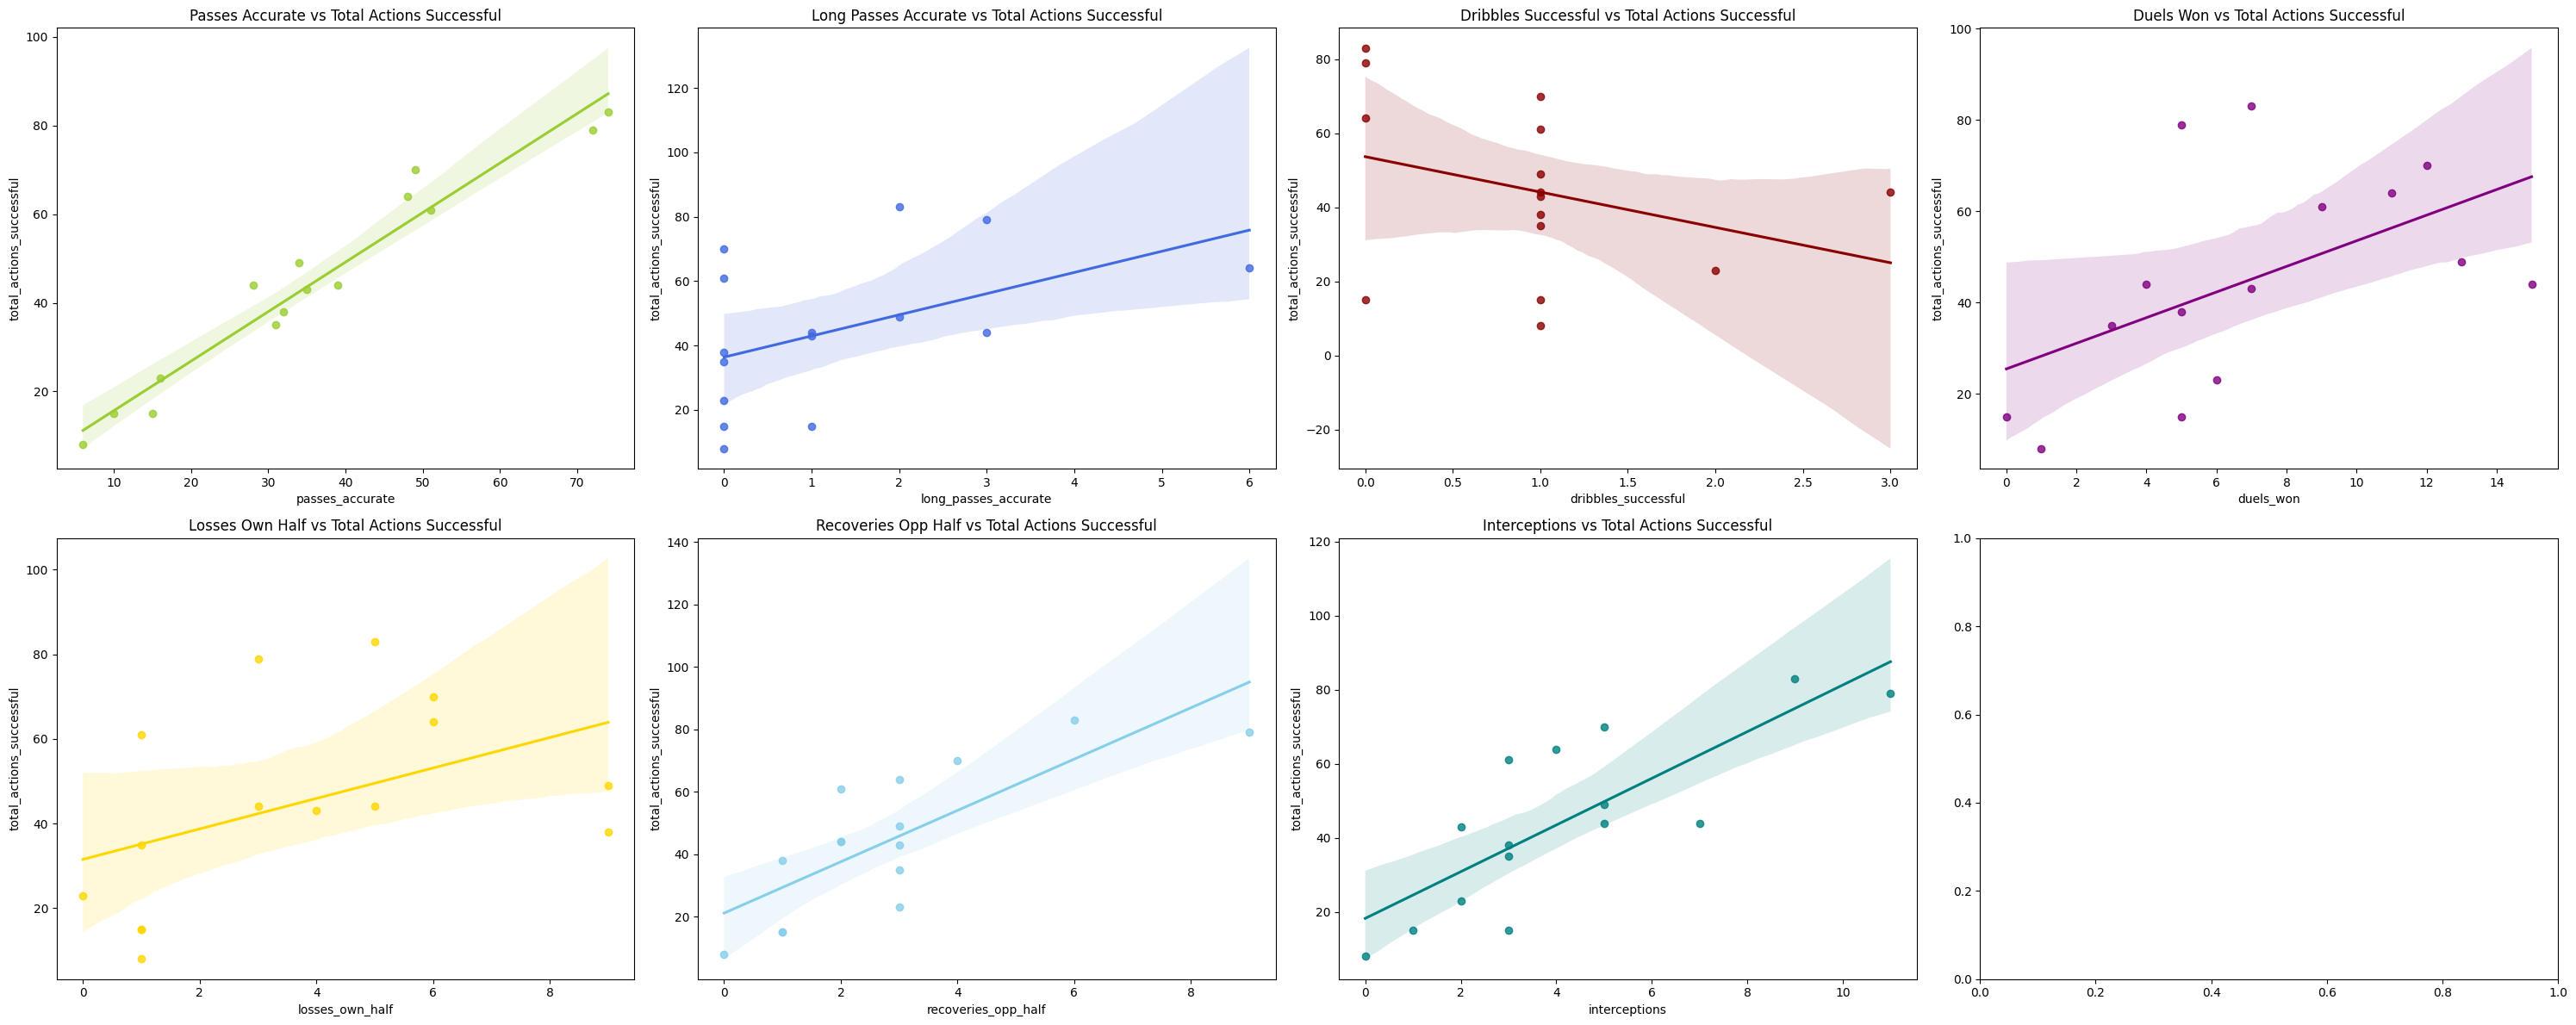

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0,0], color='yellowgreen')
axs[0,0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0,1], color='royalblue')
axs[0,1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='dribbles_successful', y='total_actions_successful', data=normalized_df, ax=axs[0,2], color='darkred')
axs[0,2].set_title('Dribbles Successful vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[0,3], color='purple')
axs[0,3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[1,0], color='gold')
axs[1,0].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[1,1], color='skyblue')
axs[1,1].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[1,2], color='teal')
axs[1,2].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

The Ordinary Least Squares (OLS) regression model provides a way to predict a dependent variable from several independent ones. Here, the dependent variable is 'total_actions_successful', which is being predicted based on various football game actions like accurate passes, successful dribbles, duels won, etc.

- The model's R-squared value is 0.995, indicating a very high level of prediction accuracy, with 99.5% of the variance in 'total_actions_successful' being explained by the independent variables in the model.

- The F-statistic is 196.6, which is relatively high, and the associated probability (Prob (F-statistic)) is very low, close to zero. This suggests that there is a significant relationship between the model's independent variables and the dependent variable.

- The coefficients represent the change in the dependent variable for a one-unit change in the respective independent variable, all else being equal. For example, for every additional accurate pass, total successful actions increase by approximately 1.0063, given that all other factors remain constant. However, not all predictors are statistically significant, as indicated by their p-values. The only significant predictors at the 5% level are 'passes_accurate' (p-value = 0.000) and 'duels_won' (p-value = 0.002), suggesting that these are the factors that significantly influence the number of successful total actions.

- This model suggests that the keys to N'Golo Kanté's success lie in his accuracy in passing and his ability to win duels. A one-unit increase in his accurate passes leads to approximately one more successful action, making his pass accuracy a critical aspect of his gameplay.

- His ability to win duels also significantly contributes to his success, reinforcing Kanté's reputation as a tough competitor in 1v1 situations.

- Other factors like successful dribbles, losses in his own half, recoveries in the opposition half, and interceptions, while essential for a comprehensive picture of a midfielder's performance, do not significantly affect Kanté's overall successful actions as per this model. This might indicate that Kanté's play style is highly focused and effectively leverages his strengths in passing and dueling.

- This analysis reveals that while different aspects contribute to a player's performance, certain characteristics, like accurate passing and winning duels in the case of Kanté, can play a pivotal role in their effectiveness on the pitch.

### Based on Pass Accuracy 

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                            OLS Regression Results                            
Dep. Variable:        passes_accurate   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           3.72e-07
Time:                        21:43:37   Log-Likelihood:                -28.022
No. Observations:                  15   AIC:                             72.04
Df Residuals:                       7   BIC:                             77.71
Df Model:                           7                                         
Covariance Type:            nonrobust                        

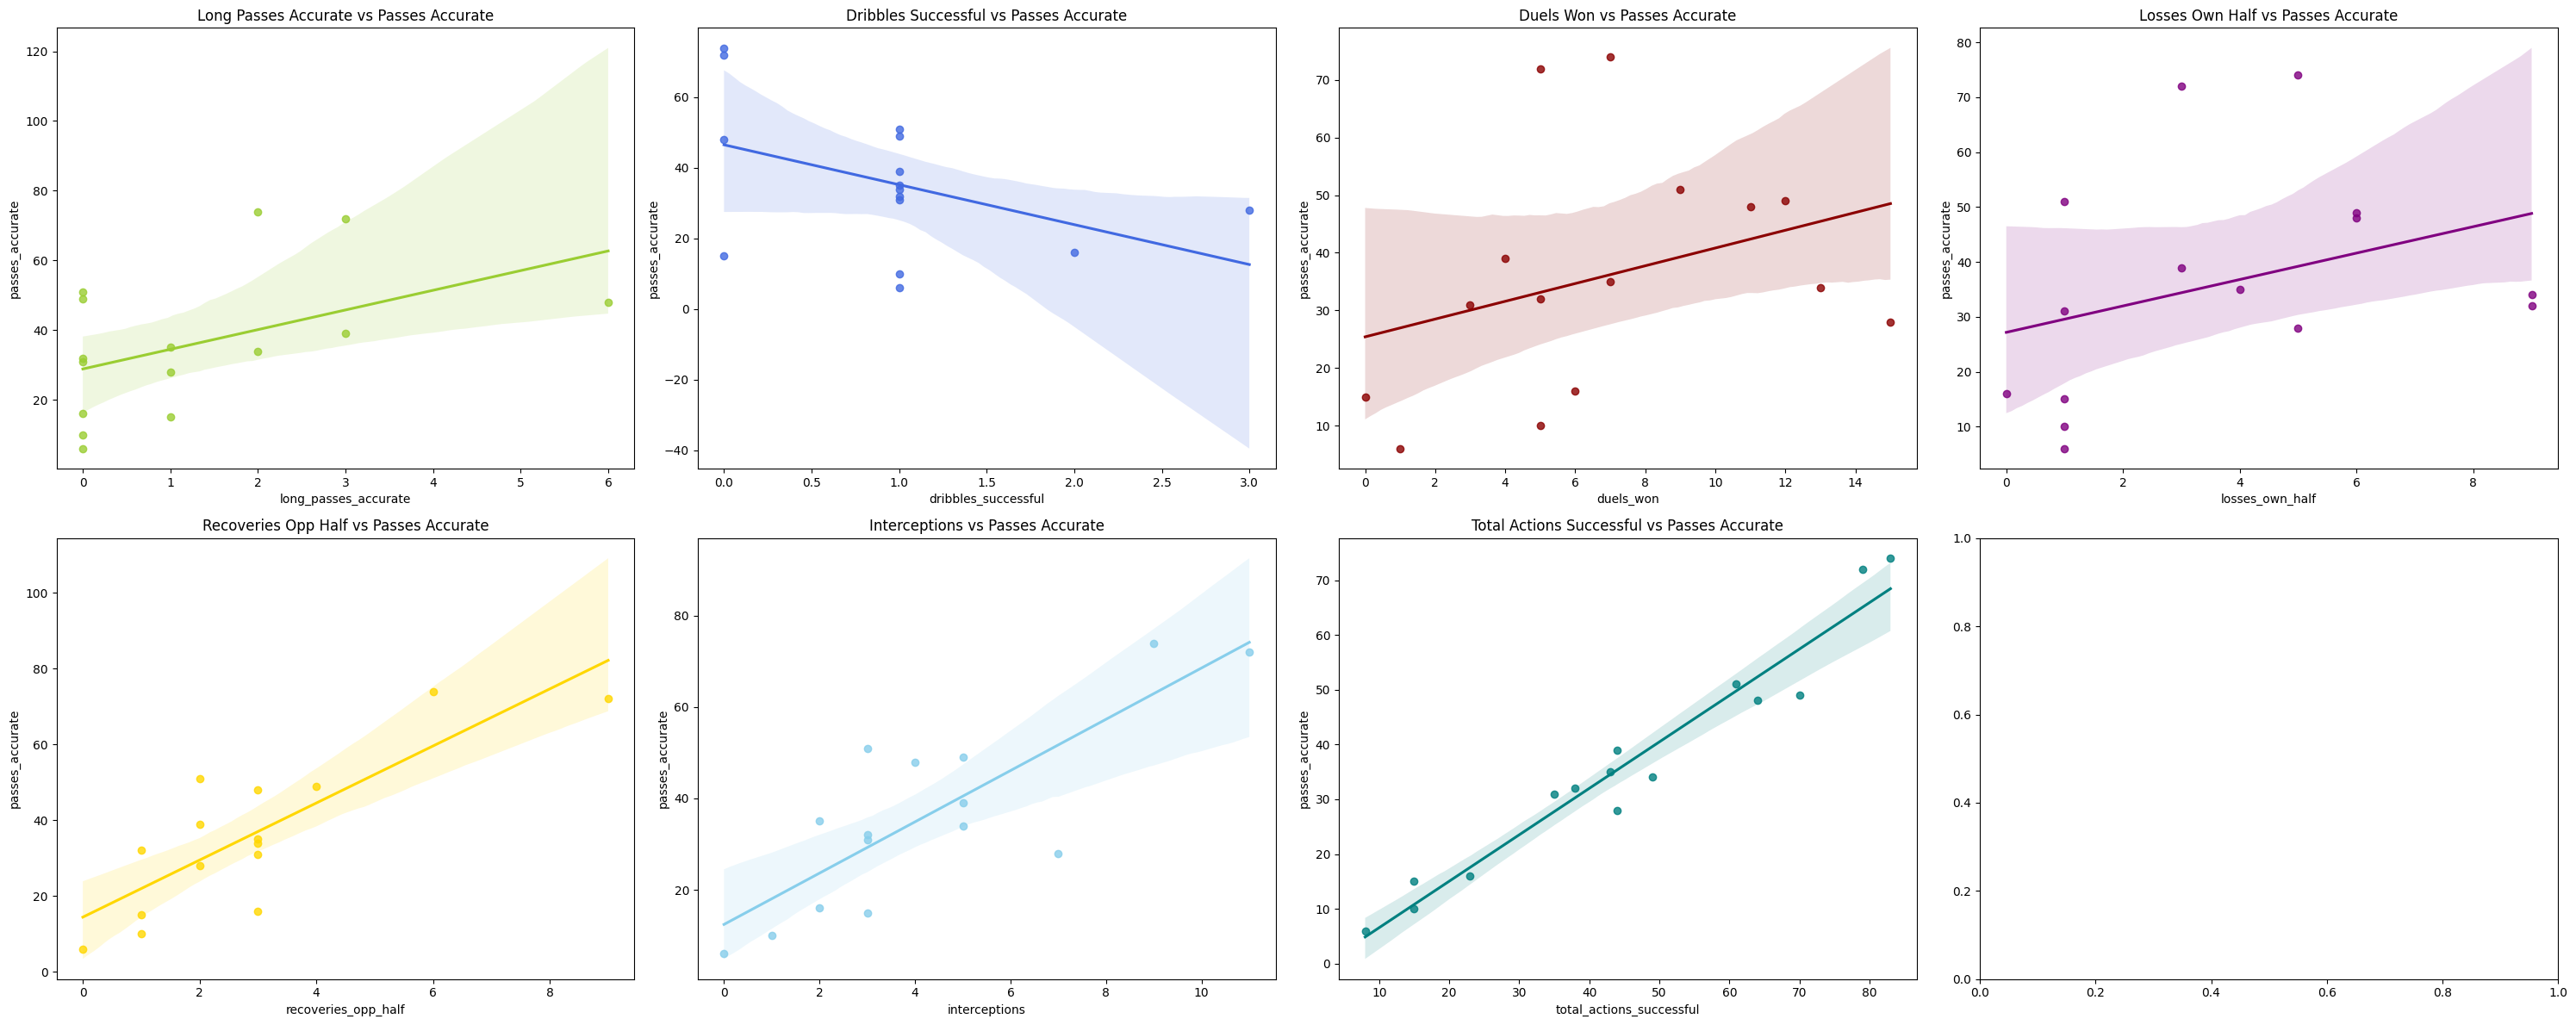

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, ax=axs[0,0], color='yellowgreen')
axs[0,0].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='dribbles_successful', y='passes_accurate', data=normalized_df, ax=axs[0,1], color='royalblue')
axs[0,1].set_title('Dribbles Successful vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, ax=axs[0,2], color='darkred')
axs[0,2].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, ax=axs[0,3], color='purple')
axs[0,3].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, ax=axs[1,0], color='gold')
axs[1,0].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, ax=axs[1,1], color='skyblue')
axs[1,1].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, ax=axs[1,2], color='teal')
axs[1,2].set_title('Total Actions Successful vs Passes Accurate')

plt.tight_layout()
plt.show()

The Ordinary Least Squares (OLS) regression model seeks to explain the dependent variable 'passes_accurate' based on various football game metrics. Here's the interpretation:

- The R-squared value is 0.994, which means that 99.4% of the variation in 'passes_accurate' can be explained by the independent variables in our model.

- The F-statistic is 156.8 and the associated probability (Prob (F-statistic)) is almost zero, indicating that our independent variables have a significant relationship with the 'passes_accurate' dependent variable.

Looking at the coefficients, we see that for every unit increase in 'total_actions_successful', the 'passes_accurate' increases by about 0.9558, assuming all other factors are constant.However, note that 'duels_won' (p-value = 0.007) and 'total_actions_successful' (p-value = 0.000) are the only variables statistically significant at a 5% level. This suggests that these are the factors that significantly influence the number of accurate passes.

On football optics

This analysis suggests that the accuracy of N'Golo Kanté's passes is significantly influenced by his overall successful actions and his performance in duels. His duels won have a negative coefficient, indicating that as the number of duels he wins increases, his passing accuracy tends to decrease slightly. This might be due to the physical exertion and focus required in duels, potentially affecting his precision in passing.

- Successful total actions significantly improve Kanté's passing accuracy, reinforcing the view that his overall effectiveness on the pitch enhances his ability to deliver accurate passes.

- Aspects like successful dribbles, losses in own half, recoveries in the opposition half, and interceptions, though integral parts of a player's performance, do not significantly impact Kanté's passing accuracy, according to this model.

The takeaways from this analysis underscore the multifaceted nature of football, where different aspects of performance can influence each other, sometimes in unexpected ways. In Kanté's case, his overall effectiveness and duel performance appear to have a substantial impact on his passing accuracy.

## Sci-kit Learn Linear Regression 

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.8574816722743357
Coefficients:
recoveries_opp_half: 0.9666471851918984
long_passes_accurate: 0.08394849413243877
passes_accurate: 1.0144964719618925
dribbles_successful: 1.2561100376398115
duels_won: -0.8330917947640124
interceptions: 0.39263587739785794
Mean squared error: 8.06
Coefficient of determination: 0.75


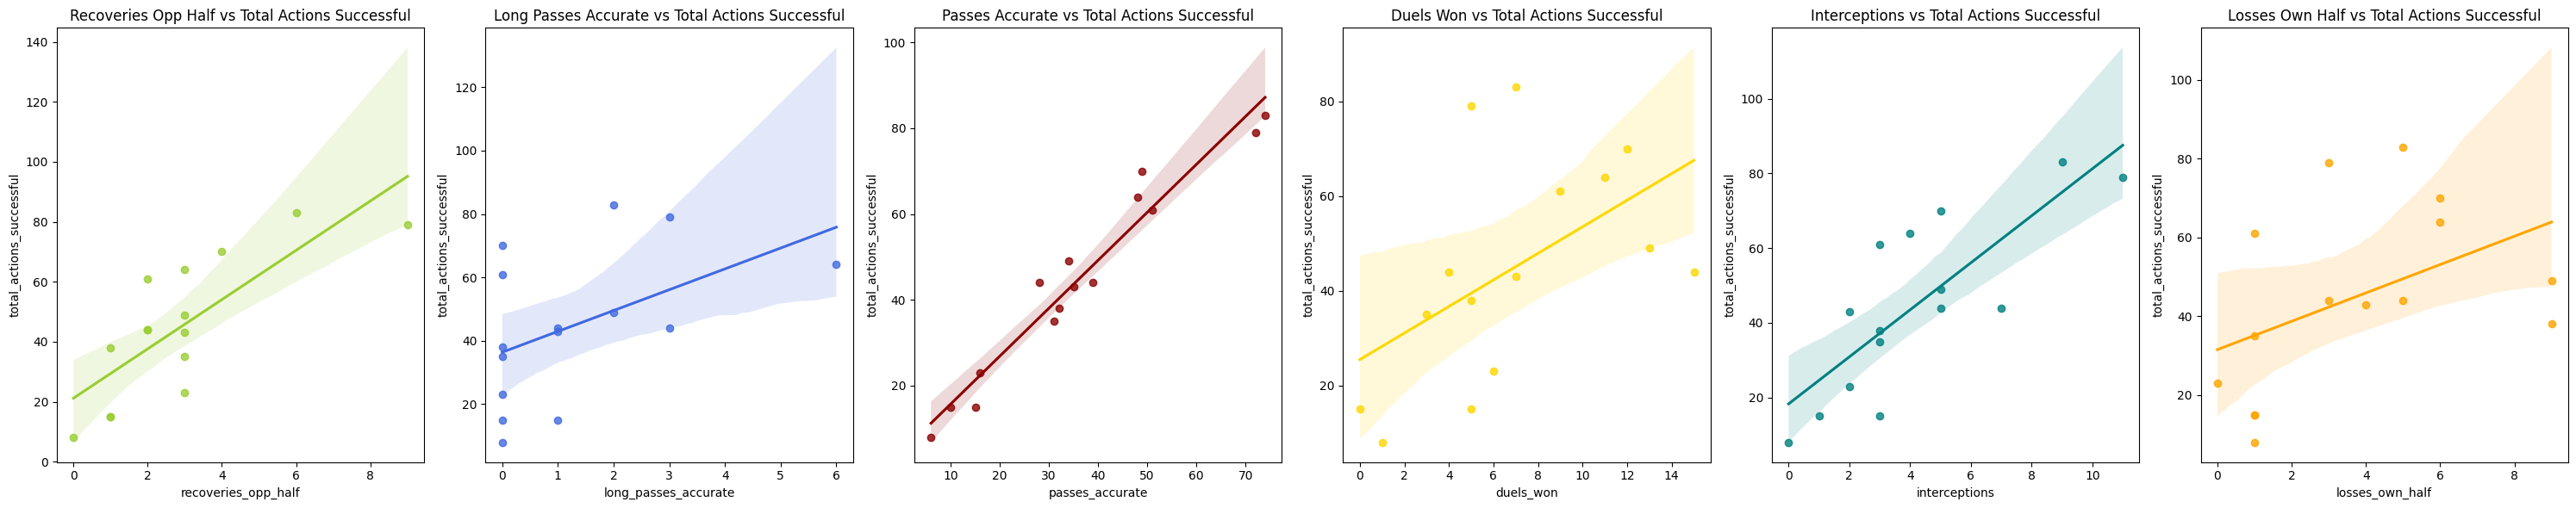

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate','duels_won', 'interceptions', 'losses_own_half']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['recoveries_opp_half', 'long_passes_accurate', 'passes_accurate', 'dribbles_successful', 'duels_won', 'interceptions', 'losses_own_half']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 6))

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='teal', ax=axs[4])
axs[4].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='orange', ax=axs[5])
axs[5].set_title('Losses Own Half vs Total Actions Successful')

plt.tight_layout()
plt.show()

Recoveries in Opponent's Half (0.96): Statistically speaking, a strong positive coefficient suggests that Kanté's recoveries in the opponent's half substantially contribute to his total successful actions. On football optics, this underlines Kanté's renowned ability to intercept and regain possession higher up the pitch, disrupting opponent plays and initiating quick transitions.

Long Passes Accurate (0.08): From a data angle, accurate long passes have a modest positive correlation with Kanté's total successful actions. On football optics, while long-range passing isn't Kanté's primary role, his capability to accurately switch plays does contribute to his overall effectiveness on the field.

Passes Accurate (1.01): Analytically, there's a strong positive association between Kanté's passing accuracy and his total successful actions. On football optics, this emphasizes Kanté's crucial role in retaining possession and ensuring smooth ball circulation within the team.

Dribbles Successful (1.25): From the data's perspective, successful dribbles play a significant role in enhancing Kanté's total successful actions. On football optics, Kanté's ability to navigate through tight spaces and retain the ball under pressure makes him an invaluable asset during transitional phases.

Duels Won (-0.83): Data-wise, the negative correlation suggests that winning more duels tends to decrease Kanté's total successful actions. On football optics, this could hint at moments where Kanté's physical confrontations might be at the expense of other impactful actions he could be performing.

Interceptions (0.39): interceptions positively correlate with Kanté's total successful actions. On football optics, Kanté's knack for reading the game and intercepting passes underlines his importance in breaking down opponent attacks.

Overall, the mean r^2 value of 0.85 signifies that the model captures around 86% of the variance in Kanté's total successful actions. It is a robust indication of how well these features represent Kanté's overall contributions on the pitch. The coefficient of determination at 0.75 suggests a good model fit.

In a nutshell, N'golo Kanté's total actions on the field represent a blend of his defensive tenacity and his ability to contribute offensively. His interceptions, recoveries, and accurate passing highlight his overall versatility, making him an instrumental figure in both the defensive and midfield areas.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.3288184413459348
Coefficients:
long_passes_accurate: -0.5461533040837493
duels_won: -1.2571450111560694
losses_own_half: -0.40869568202809503
recoveries_opp_half: -1.1363545659255474
interceptions: 1.0947604395872044
total_actions_successful: 0.9726228107742954
Mean squared error: 9.98
Coefficient of determination: 0.96


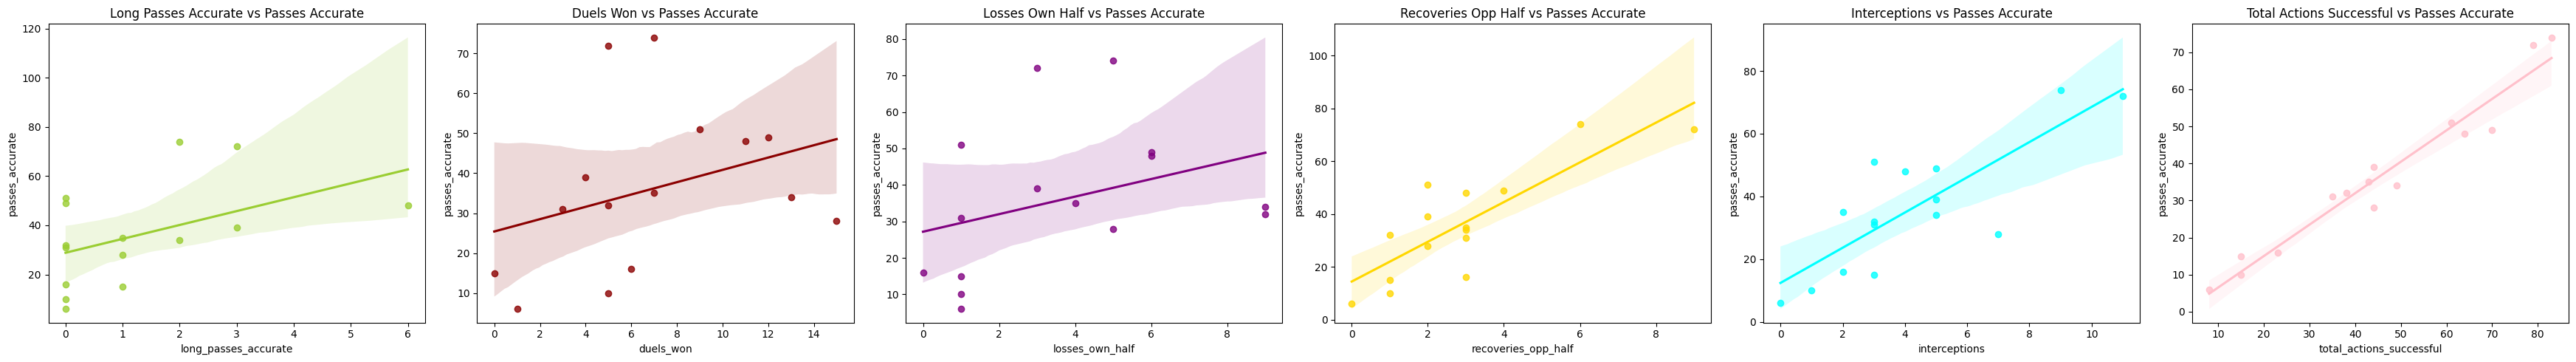

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(35, 5))

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[1])
axs[1].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='cyan', ax=axs[4])
axs[4].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='pink', ax=axs[5])
axs[5].set_title('Total Actions Successful vs Passes Accurate')

plt.tight_layout()
plt.show()

Long Passes Accurate (-0.54): From a statistical angle, an increase in accurate long passes appears to reduce Kanté's overall pass accuracy. On football optics, this could suggest that while Kanté occasionally attempts riskier long balls, these efforts may not always be successful, affecting his overall passing accuracy.

Duels Won (-1.25): there's a strong indication that winning more duels leads to a significant decline in pass accuracy for Kanté. On football optics, this could hint that after intense physical contests in midfield battles, Kanté might occasionally rush his passes, leading to inaccuracies.

Losses in Own Half (-0.40): Data-wise, an increase in losses in his own half is negatively associated with pass accuracy. On football optics, these losses could represent moments when Kanté is under pressure from opposing players, which might momentarily disrupt his usual composure in passing.

Recoveries in Opponent's Half (-1.13): Analyzing the data, there's a notable negative correlation, suggesting that as Kanté makes more recoveries in the opponent's half, his pass accuracy tends to decrease. On football optics, this indicates that while Kanté's forward recoveries disrupt opponent plays, they might also place him in challenging positions, leading him to attempt riskier passes.

Interceptions (1.09): the positive coefficient implies that successful interceptions significantly enhance pass accuracy for Kanté. On football optics, after intercepting the ball, Kanté is likely in positions where he can distribute the ball effectively, facilitating smoother transitions into attacks.

Total Actions Successful (0.97): there's a high correlation between successful actions and pass accuracy. On football optics, when Kanté is in form, his overall influence on the game, including accurate passing, becomes increasingly evident.

Overall, the mean r^2 value of 0.32 indicates that the model and the features capture around 33% of the variance in Kanté's pass accuracy. This percentage might seem on the lower side, but football's complex nature means multiple factors could influence pass accuracy outside of these features. However, with a coefficient of determination at 0.96, the model seems to fit well, emphasizing these specific features' importance in understanding Kanté's passing dynamics.

In essence, N'golo Kanté's pass accuracy is influenced by both his defensive prowess and offensive engagements. While certain defensive actions might momentarily impact his passing accuracy, his interceptions and overall successful actions underline his indispensable role in ball distribution and midfield control.

## XGBoost & Cross Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.


### Based on Total Actions

Mean cross-validation score: 0.87
MAE: 3.7215034484863283
MSE: 20.322531337887632
R^2: 0.9175221942455859


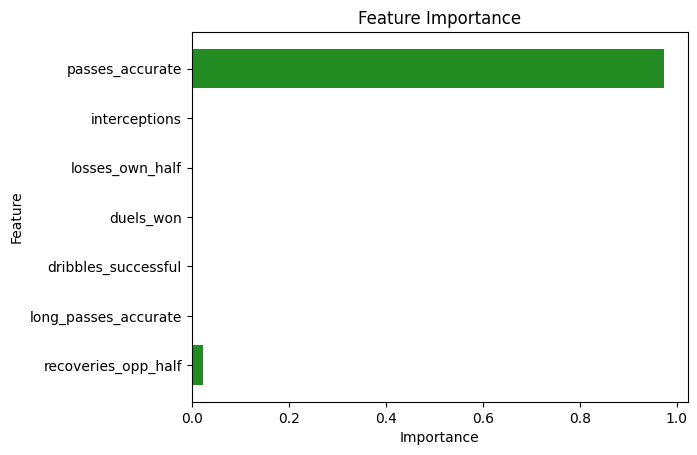

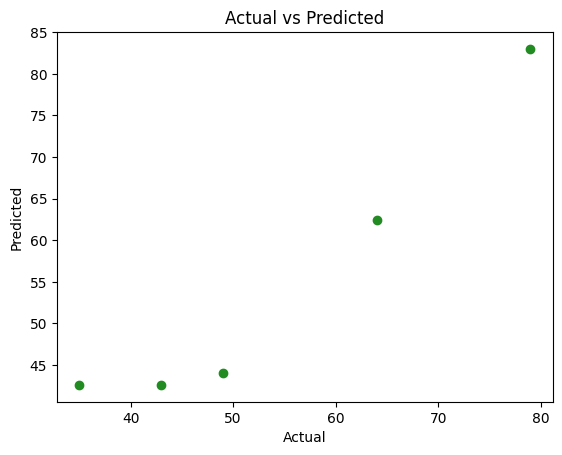

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'interceptions', 'passes_accurate']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='forestgreen') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='forestgreen')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- The Mean cross-validation score is 0.87, suggesting that the model is quite good at predicting the target variable, as this score reflects the model's ability to generalize to new data. The cross-validation technique helps to prevent overfitting by providing a robust estimate of the model performance. On football optics, implies that the model does a commendable job at predicting N'Golo Kanté's performance metrics based on the given features, maintaining a high degree of accuracy.

- The Mean Absolute Error (MAE) is 3.72, which gives an idea of how far off our predictions are on average. Specifically, our predictions are, on average, approximately 3.72 units away from the actual values. On football optics,  indicates that the model's predictions on Kanté's performance are, on average, around 3.72 units away from the actual value. This margin of error, considering the context of football statistics, might be acceptable.

- The Mean Squared Error (MSE), another measure of prediction error, is 20.32. Since it squares the differences before averaging them, MSE places more weight on larger errors. 

- The Coefficient of Determination, or R^2, is 0.917. This indicates that our model explains approximately 91.7% of the variability in our target variable, which is a very high proportion and indicates a strong model. On football optics, suggests that about 91.7% of the variations in Kanté's performance can be explained by the model's variables. This could be a potent tool for performance analysts and coaching staff in understanding and optimizing Kanté's gameplay. However, as always in sports, it's important to remember that while statistics can guide decisions, they must be interpreted alongside qualitative evaluations like tactical understanding and on-field observations.

### Based on Pass Accuracy

Mean cross-validation score: 0.37
MAE: 2.4622520446777343
MSE: 8.643392017719453
R^2: 0.9624200347055676


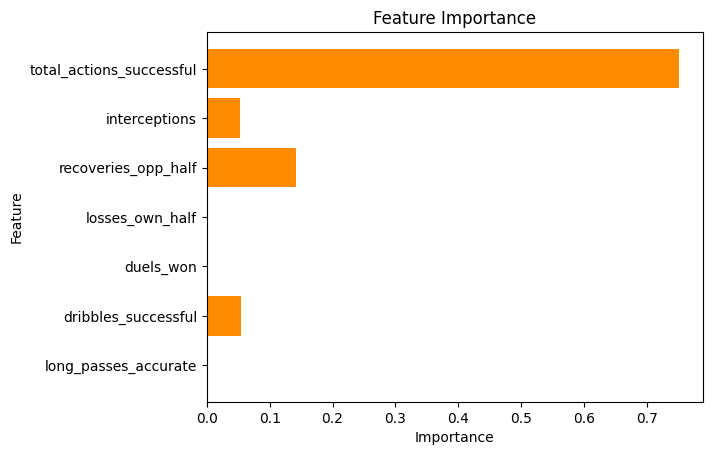

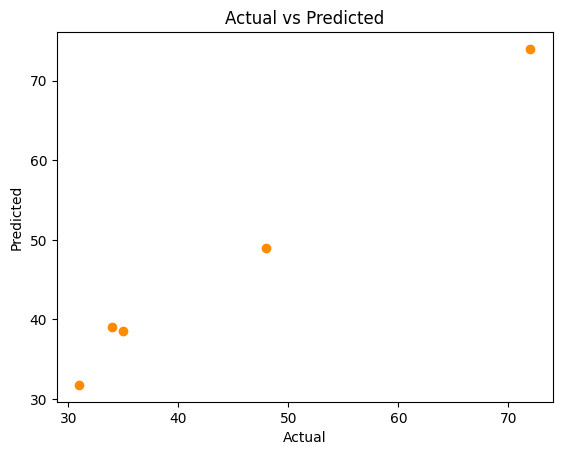

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'total_actions_successful']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- The Mean cross-validation score is 0.37, which is considerably lower than in the previous case. While this score is still above zero (which would indicate a model no better than random guessing), it suggests that this model may not be as effective at generalizing to unseen data.

- - The Mean Absolute Error (MAE) is 2.46, indicating that, on average, the model's predictions are about 2.46 units away from the actual values. While this is an improvement over the previous model, given the lower cross-validation score, this might be due to the model overfitting to the training data.

- - The Mean Squared Error (MSE) is 8.64. This is lower than in the previous model, which could indicate that the model makes fewer large errors. However, the higher emphasis on larger errors might also be a sign of overfitting.

- - The Coefficient of Determination, or R^2, is 0.962. This is a very high value, suggesting that the model explains a large proportion (about 96.2%) of the variability in the target variable. Again, given the low cross-validation score, caution should be exercised as this might be a sign of overfitting to the training data.

On football optics

The Mean cross-validation score of 0.37 suggests that this model's ability to predict N'Golo Kanté's performance based on the input features is less reliable than the previous model. It may indicate that the model is missing some important factors in understanding Kanté's performance.

The MAE score shows that the model's predictions on Kanté's performance are on average around 2.46 units away from the actual value. This seems to be an acceptable margin of error, considering the scope of football statistics.

Despite the low cross-validation score, the R^2 score is impressively high at 96.2%. This could mean that the model's variables explain a substantial amount of the variability in Kanté's performance. However, as always, one must remember that these statistics are only part of the picture and must be supplemented with qualitative evaluations like player technique and match context.

## Conformal Prediction

### Conformal Prediction
Conformal Prediction provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 69.70%
Average prediction interval width: 35.77


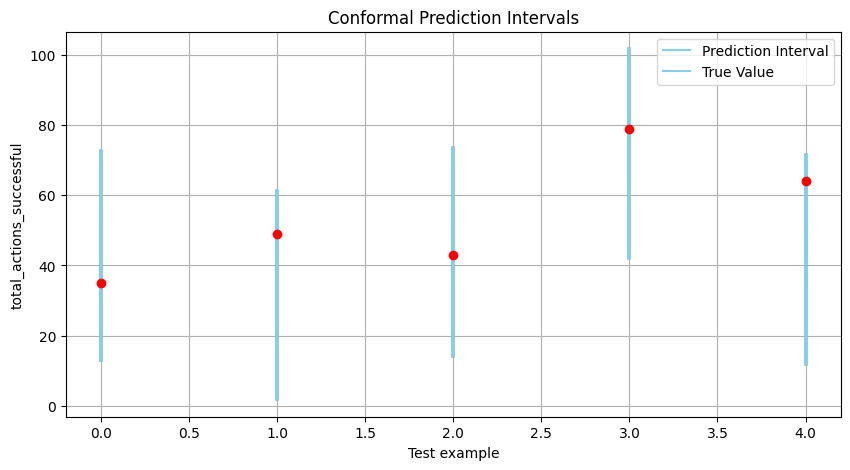

In [ ]:
# Prepare the data
X = normalized_df[['recoveries_opp_half', 'long_passes_accurate', 'dribbles_successful', 'duels_won', 'losses_own_half', 'interceptions', 'passes_accurate']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model (you can replace this with the XGBoost model or any other model)
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('total_actions_successful')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid(True)
plt.show()

- The Prediction Interval Coverage is at 69.70%. This implies that nearly 70% of the actual observations fall within the predicted intervals. In statistical terms, the model's predictions have a 70% confidence level. However, this also means that about 30% of the time, the actual values fall outside the prediction interval, indicating room for model improvement. On football optics, the Prediction Interval Coverage of nearly 70% indicates that the model reasonably well predicts N'Golo Kanté's performance. The model's predictions are correct about 70% of the time, which is a solid foundation, but not perfect. In a sport where games can be decided by small margins, those 30% of missed predictions could be critical.

- The Average Prediction Interval Width is 35.77. This value reflects the average range of the predictions made by the model. A wider interval may suggest increased uncertainty in the model's predictions, meaning there's greater variability in the data the model is trying to predict. On football optics, there's a fair bit of variability in Kanté's performance, as predicted by the model. This isn't surprising in football where player performance can fluctuate due to numerous factors, from their physical condition on the day, to the tactics employed by the opposition.

### Based on Pass Accuracy

Prediction interval coverage: 79.80%
Average prediction interval width: 11.85


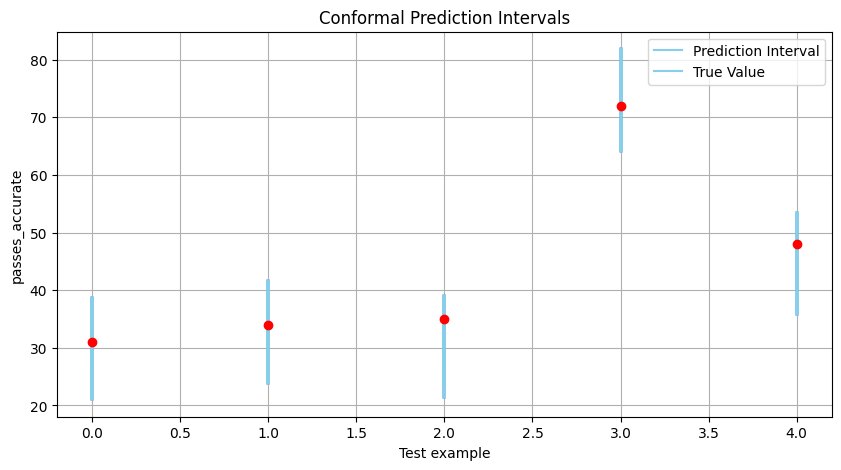

In [ ]:
# Prepare the data
X = normalized_df[['duels_won', 'losses_own_half', 'interceptions', 'total_actions_successful']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model (you can replace this with the XGBoost model or any other model)
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Visualization
plt.figure(figsize=(10, 5))
for i, (lower, upper) in enumerate(predictions):
    plt.plot((i, i), (lower, upper), color="skyblue")
plt.plot(y_test.values, "ro")
plt.title('Conformal Prediction Intervals')
plt.xlabel('Test example')
plt.ylabel('passes_accurate')
plt.legend(['Prediction Interval', 'True Value'])
plt.grid(True)
plt.show()

Prediction interval coverage (79.80%): is relatively commendable. This means that the model is correctly predicting the range within which Kanté's actual pass accuracy falls about 80% of the time. While there is always room for improvement, this coverage suggests a reasonably robust prediction model for Kanté's passing game. It might be interesting to delve deeper into what specific factors or data points are helping achieve this accuracy, to further refine the model. On football optics, portrays Kanté's consistency and reliability in his passing game. It reaffirms what many football analysts and fans believe about Kanté - that he is a highly dependable player, especially when it comes to retaining and distributing possession.

Average prediction interval width (11.85): is a bit broad. This indicates that while the model does predict the interval containing the actual outcome around 80% of the time, the predicted range itself is fairly wide. Reducing this interval width would result in more precise predictions. It would be crucial to understand the reasons behind this breadth. Maybe the model is accounting for situational variability or there might be outliers in the data influencing this width. On football optics, could denote variability in Kanté's passing, depending on the match scenario. Whether he's facing high-press teams, attempting riskier forward passes, or simply retaining possession, this range indicates that his accuracy might oscillate based on various in-game factors.

To sum it up, the conformal prediction outcomes for N'golo Kanté's "Pass Accuracy" are quite indicative of his consistent role in the middle of the park. The model appears to capture a fair chunk of this consistency, though it might benefit from a bit of fine-tuning for precision. 

## Radar Map Visualization

### N'Golo Kanté Chelsea 1st Leg (2022)

- Total Actions Success (TAS): 58%

- Passes Accurate (PA): 83 %

- Long Passes Accurate (LPA): 100%

- Dribbles Success (DS): 0%

- Duels Won (DW): 0%

- Losses (LOH): 50%

- Recoveries (ROPH): 33%

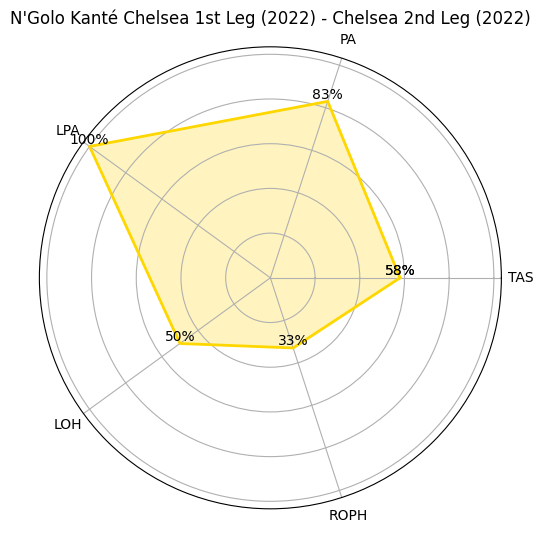

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'LOH', 'ROPH'])
stats = np.array([58, 83, 100, 50, 33])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("N'Golo Kanté Chelsea 1st Leg (2022) - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### N'Golo Kanté Chelsea 2nd Leg (2022)

- Total Actions Success (TAS): 70%

- Passes Accurate (PA): 85%

- Long Passes Accurate (LPA): 33%

- Dribbles Success (DS): 0%

- Duels Won (DW): 47%

- Losses (LOH): 36%

- Recoveries (ROPH): 50%

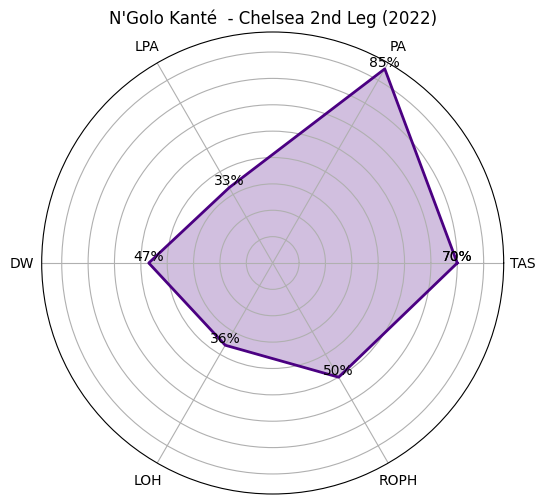

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([70, 85, 33, 47, 36, 50])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("N'Golo Kanté  - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='indigo', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='indigo', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### N'Golo Kanté Chelsea 1st Leg (2023)

- Total Actions Success (TAS): 56%

- Passes Accurate (PA): 80%

- Long Passes Accurate (LPA): 0%

- Dribbles Success (DS): 50%

- Duels Won (DW): 31%

- Losses (LOH): 75%

- Recoveries (ROPH): 14%

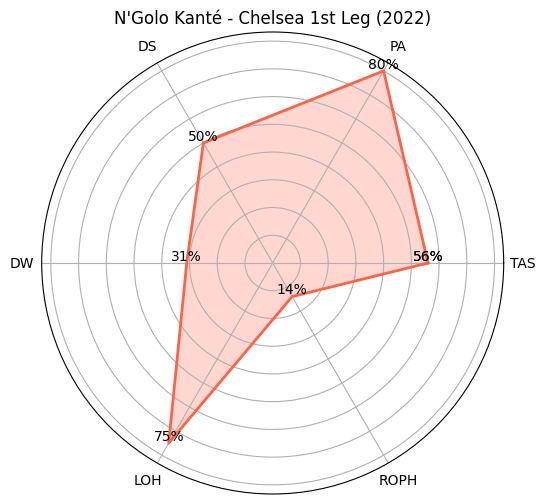

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DS', 'DW', 'LOH', 'ROPH'])
stats = np.array([56, 80, 50, 31, 75, 14])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("N'Golo Kanté - Chelsea 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='tomato', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='tomato', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### N'Golo Kanté Chelsea 2nd Leg (2023)

- Total Actions Success (TAS): 64%

- Passes Accurate (PA): 88%

- Long Passes Accurate (LPA): 100%

- Dribbles Success (DS): (4-4) -> 100 %

- Duels Won (DW): 41%

- Losses (LOH): 67%

- Recoveries (ROPH): 0%

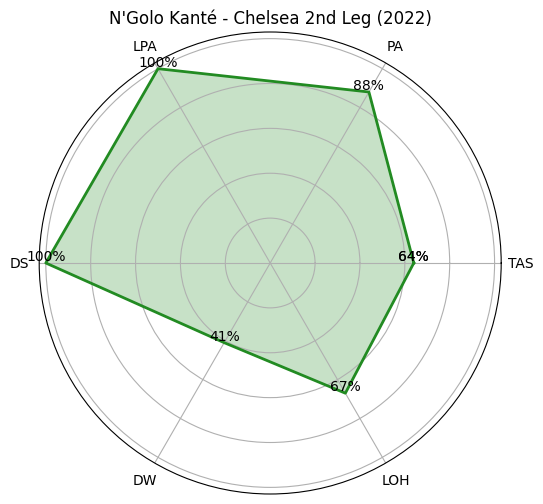

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DS', 'DW', 'LOH'])
stats = np.array([64, 88, 100, 100, 41, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("N'Golo Kanté - Chelsea 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bd92df9b-de5a-4e18-be79-b051cf7c3e49' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>